In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import scipy
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.dpi'] = 110    

# **1. Entendimiento del negocio**

## **1.1 Entendimiento del negocio**

Tele-mobile es una empresa dedicada a la prestación del servicio de telefonía móvil. En los últimos años ha presentado tasas importantes del retiro del servicio, ya sea por falta de pago (deudores morosos) o por abandono del servicio (deserción), causando inestabilidad financiera a la empresa y posiblemente una futura quiebra si no se toman acciones oportunas.

## **1.2 Objetivo del proyecto**

El objetivo del proyecto es mejorar mediante herramientas de análisis y visualización de datos la caracterización de los clientes que se retiran del servicio de telefonía móvil, ya sea por falta de pago (deudores morosos) o por abandono del servicio (deserción), con el fin de que Tele-mobile pueda tomar decisiones oportunas y más enfocadas en ciertas poblaciones para disminuir el índice de retiros de cliente del servicio. 
Las características de los clientes y del servicio que se desean estudiar son las siguientes:

*	Plan 
*	Tipo de plan                   
*	Valor del plan     
*	Estado de conexión del servicio 
*	Estado financiero del servicio
*	Saldo pendiente por pagar
*	Tipo de identificación   
*	Ciudad 
*	Edad del cliente
*	Antigüedad del servicio 
*	Número promedio de quejas anual  
*	Número promedio reclamos anual
*	Valor promedio reclamos anual


# **2. Entendimiento de los datos**




## **Origen y descripción de los datos**

Los datos con los que se realizará este proceso de análisis se obtuvieron a partir de las bases de datos de desarrollo de Tele-mobile, cliente de la empresa desarrolladora de software para la que trabajo. Estos corresponden a información de las de las líneas telefónicas activas hasta el año 2019 y retiradas entre los años 2017 y 2019 en dos de las ciudades donde presta el servicio Tele-mobile. Además contiene también información de los clientes dueños de las líneas, e información de las quejas y reclamos de facturación presentados sobre las líneas telefónicas.

Información de las líneas tanto activas como retiradas:

* Código del producto: identificador de la línea	
* Código del cliente: ID usuario dueño de la línea	
* Fecha de instalación: Fecha de instalación del servicio	
* Fecha de retiro:	Fecha de desinstalación del servicio	
* Plan: plan de la línea 
* Tipo de plan: tipo del plan de la línea (P: prepago, S: postpago, C: control )	
* Valor plan: valor mensual pagado por el plan	
* Código estado: identificador del estado de conexión de la línea para líneas retiradas
* Estado: descripción del estado (conectado, suspendido, retirado por no pago, retirado atención al cliente (deserción))
* Ciclo: división administrativa de las líneas	
* Estado financiero: estado de la deuda del servicio (paz y salvo, mora)	
* Saldo pendiente: valor total adeudado a la fecha
* Valor en reclamo: valor total reclamos facturación a la fecha

Información de los clientes:

* Código del cliente	
* Tipo de cliente	
* Tipo de identificación	
* Fecha de nacimiento	
* Género	
* Estado civil	
* Profesión	
* Grado de escolaridad	
* Nivel de ingresos	
* Nivel de egresos	
* Ciudad

## **2.1 Adquisición de los datos y descripciones generales**



Cargamos la información de las líneas móviles telefónicas activas hasta el 2019 a partir de la hoja correspondiente del excel dataproyecto.xlsx:

In [ ]:
#Cargamos la información de las líneas activas
dflineasactivas = pd.read_excel("dataproyecto.xlsx", 
                                sheet_name = 'Líneas activas hasta 2019' #Hoja de cálculo a cargar.
                               )

dflineasactivas.head()

,código del producto,código del cliente,fecha de instalación,fecha de retiro,plan,tipo de plan,valor plan,estado,ciclo,estado financiero,saldo pendiente,valor en reclamo
0,4733577,655662,2016-12-05 15:21:46,4732-12-31 23:59:59,VIRTUAL EMPRESA GSM,S,NaN,CONEXION,CLIENTES VENTA DIRECTA GSM,MORA,36866.67,0.0
1,6340675,1541283,2018-06-12 11:27:18,4732-12-31 23:59:59,VIRTUAL EMPRESA GSM,S,NaN,RETIRADO,CLIENTES VENTA DIRECTA GSM,MORA,14047.21,0.0
2,6508797,2688526,2018-08-07 17:51:17,4732-12-31 23:59:59,VIRTUAL EMPRESA GSM,S,NaN,RETIRADO,CLIENTES VENTA DIRECTA GSM,MORA,4224.76,0.0
3,4814737,382011,2017-01-06 11:36:58,4732-12-31 23:59:59,VIRTUAL EMPRESA GSM,S,NaN,CONEXION,CLIENTES VENTA DIRECTA GSM,MORA,2015.82,0.0
4,7227694,3001812,2019-07-01 17:02:54,4732-12-31 23:59:59,PLAN PROMO CAMPANAS,C,47.98,CONEXION,CLIENTES CONTRATO 16 - 22,MORA,1438.75,0.0


In [ ]:
#Verificamos columnas y cantidad de datos nulos
dflineasactivas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86550 entries, 0 to 86549
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   código del producto   86550 non-null  int64         
 1   código del cliente    86550 non-null  int64         
 2   fecha de instalación  86550 non-null  datetime64[ns]
 3   fecha de retiro       86550 non-null  object        
 4   plan                  86550 non-null  object        
 5   tipo de plan          86550 non-null  object        
 6   valor plan            85972 non-null  float64       
 7   estado                86550 non-null  object        
 8   ciclo                 86550 non-null  object        
 9   estado financiero     86550 non-null  object        
 10  saldo pendiente       86550 non-null  float64       
 11  valor en reclamo      86550 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(6)
memory usage: 7.9+ M

El número de registros es el esperado. Se observan valores faltantes en la columna numérica Valor del plan pero en una medida razonable.

In [ ]:
#Verificamos estadísticas descriptivas por cada columna
dflineasactivas.describe()

,código del producto,código del cliente,valor plan,saldo pendiente,valor en reclamo
count,8.655000e+04,8.655000e+04,85972.000000,86550.000000,86550.000000
mean,4.847009e+06,1.511612e+06,77.220173,7.185170,0.000129
std,1.542489e+06,7.988470e+05,244.716541,136.252221,0.038070
min,6.651350e+05,2.963000e+03,0.000000,-2.630000,0.000000
25%,3.628227e+06,9.229830e+05,0.000000,0.000000,0.000000
50%,4.911858e+06,1.410701e+06,0.000000,0.000000,0.000000
75%,6.188116e+06,2.138566e+06,47.980000,0.000000,0.000000
max,7.245985e+06,3.008277e+06,2618.000000,36866.670000,11.200000


De acuerdo a la media, desviación estándar, valor mínimo y máximo de cada una de las columnas, no se encuentran valores por fuera de lo normal. Se observa un valor máximo de los campos valor del plan y saldo pendiente muy alto con respecto a la media, pero esto se debe a que existen algunos clientes corporativos los cuales pueden presentar este tipo de valores.

Hacemos recuento de los posible valores de los atributos categóricos del dataset de líneas activas:

In [ ]:
dflineasactivas['estado'].value_counts()

CONEXION                        83784
SUSPENSION PARCIAL               1766
SUSPENSION TOTAL                  871
INACTIVO                           79
RETIRADO                           28
RETIRO ATENCION CLIENTE            19
ORDEN DE CONEXION                   2
ORDEN DE SUSPENSION PARCIAL         1
Name: estado, dtype: int64

Se observan registros en estado inactivo y retirado que 
posiblemente son registros inconsistentes. Representan solo el 0.02% de la población.


In [ ]:
dflineasactivas = dflineasactivas.query('estado not in ["INACTIVO", "RETIRADO", "RETIRO ATENCION CLIENTE"]')

In [ ]:
dflineasactivas['estado'].value_counts()

CONEXION                        83784
SUSPENSION PARCIAL               1766
SUSPENSION TOTAL                  871
ORDEN DE CONEXION                   2
ORDEN DE SUSPENSION PARCIAL         1
Name: estado, dtype: int64

In [ ]:
dflineasactivas['tipo de plan'].value_counts()

P    57023
C    29337
S       64
Name: tipo de plan, dtype: int64

In [ ]:
dflineasactivas['plan'].value_counts()

CHIP + |3/30                                  27724
CHIP + PREPAGO                                16511
PLAN PROMO CAMPANAS                           13203
CNT CHIP HSPA PLUS                             5920
PLAN CONTROLADO DATOS +VOZ 3                   3289
                                              ...  
MULTIPLAN CONTROL SERVIDOR PUBLICO GSM            1
DISCAPACITADO HSPA PLUS CONTROL                   1
EMPRESA ABIERTO 3.5G                              1
TARIFA UNICA HSPA PLUS CTRL IND                   1
BANDA ANCHA PREACTIVADO PREPAGO BIESS|0/30        1
Name: plan, Length: 63, dtype: int64

Cargamos la información de los clientes/usuarios del servicio de las líneas activas a partir de la hoja correspondiente del excel dataproyecto.xlsx:

In [ ]:
#Cargamos la información de los clientes/usuarios del servicio de las líneas activas
dfclientesactivas = pd.read_excel("dataproyecto.xlsx", 
                                  sheet_name = 'Clientes líneas activas' #Hoja de cálculo a cargar.
                                 )
dfclientesactivas.head()

,código del cliente,tipo de cliente,tipo de identificación,fecha de nacimiento,género,estado civil,profesión,grado de escolaridad,nivel de ingresos,nivel de egresos,ciudad
0,2963,NORMAL,R.U.C,1998-08-01 00:00:00,M,Soltero,BACHILLER,Universidad,800 - 1000,500 - 800,CUENCA
1,3949,NORMAL,R.U.C,2006-11-13 00:00:00,M,Soltero,FABRICANTE,Universidad,800 - 1000,500 - 800,AMBATO
2,3966,NORMAL,Cédula,1974-08-01 00:00:00,F,Casado,EMPLEADA PRIVADA,Universidad,500 - 800,300 - 500,CUENCA
3,4125,NORMAL,R.U.C,2011-01-01 00:00:00,M,Soltero,BACHILLER,Universidad,800 - 1000,500 - 800,CUENCA
4,5406,NORMAL,R.U.C,1948-01-24 00:00:00,M,Soltero,BACHILLER,Universidad,800 - 1000,500 - 800,CUENCA


In [ ]:
#Verificamos columnas y cantidad de datos nulos
dfclientesactivas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58052 entries, 0 to 58051
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   código del cliente      58052 non-null  int64 
 1   tipo de cliente         58052 non-null  object
 2   tipo de identificación  58052 non-null  object
 3   fecha de nacimiento     56902 non-null  object
 4   género                  6109 non-null   object
 5   estado civil            4948 non-null   object
 6   profesión               4819 non-null   object
 7   grado de escolaridad    3267 non-null   object
 8   nivel de ingresos       3300 non-null   object
 9   nivel de egresos        3282 non-null   object
 10  ciudad                  58052 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.9+ MB


Se observa más de un 89% de datos faltantes para las columnas Género, Estado 
civil, Profesión, Grado de escolaridad, Nivel de ingresos y de egresos. Esto se debe a que en el sistema transaccional no es requerido ingresar esta información al momento de registrar nuevos usuarios. Otras columnas con valores faltantes pero en una medida mucho menor que las antes mecionadas son las columnas Tipo de identificación y Fecha de nacimiento.

Este dataset no contiene datos numéricos a parte del código del cliente por lo que el método describe() no arroja información de importancia.

Hacemos recuento de los posible valores de los atributos categóricos del dataset de clientes de las líneas activas:

In [ ]:
dfclientesactivas['tipo de cliente'].value_counts()

NORMAL         58013
PRUEBA PLAN       36
VIP                1
MASIVO             1
CORPORATIVO        1
Name: tipo de cliente, dtype: int64

In [ ]:
dfclientesactivas['tipo de identificación'].value_counts()

Cédula                   55588
R.U.C                     1336
Pasaporte                  981
Cédula de Extranjería      143
Otro                         4
Name: tipo de identificación, dtype: int64

Unimos datasets de líneas activas y de clientes activos, para analizar los datos de la líneas teniendo en cuenta también las características de los clientes.

In [ ]:
dflineasactivas = dflineasactivas.join(dfclientesactivas.set_index('código del cliente'), on='código del cliente', how='inner')
dflineasactivas.head()

,código del producto,código del cliente,fecha de instalación,fecha de retiro,plan,tipo de plan,valor plan,estado,ciclo,estado financiero,saldo pendiente,valor en reclamo,tipo de cliente,tipo de identificación,fecha de nacimiento,género,estado civil,profesión,grado de escolaridad,nivel de ingresos,nivel de egresos,ciudad
0,4733577,655662,2016-12-05 15:21:46,4732-12-31 23:59:59,VIRTUAL EMPRESA GSM,S,NaN,CONEXION,CLIENTES VENTA DIRECTA GSM,MORA,36866.67,0.0,NORMAL,R.U.C,2011-08-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,AMBATO
257,2484167,655662,2014-06-10 10:21:59,4732-12-31 23:59:59,PLAN TARIFA UNICA $0.08 HSPA PLUS CTRL IND,C,373.0,CONEXION,CLIENTES CONTRATO 1 - 7,MORA,128.80,0.0,NORMAL,R.U.C,2011-08-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,AMBATO
258,2484176,655662,2014-06-10 10:25:39,4732-12-31 23:59:59,PLAN TARIFA UNICA $0.08 HSPA PLUS CTRL IND,C,373.0,CONEXION,CLIENTES CONTRATO 1 - 7,MORA,128.80,0.0,NORMAL,R.U.C,2011-08-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,AMBATO
446,5238166,655662,2017-06-14 07:11:03,4732-12-31 23:59:59,VIRTUAL EMPRESA GSM,S,NaN,CONEXION,CLIENTES VENTA DIRECTA GSM,MORA,104.44,0.0,NORMAL,R.U.C,2011-08-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,AMBATO
1046,2607847,655662,2014-09-15 16:20:35,4732-12-31 23:59:59,DATOS Y VOZ CBM 0 CTRL 3.5G,C,0.0,CONEXION,CLIENTES CONTRATO 1 - 7,MORA,67.19,0.0,NORMAL,R.U.C,2011-08-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,AMBATO


Cargamos la información de las líneas móviles de telefonía retiradas entre los años 2017 y 2019 a partir de la hoja correspondiente del excel dataproyecto.xlsx:

In [ ]:
#Cargamos la información de las líneas retiradas entre 2017 y 2019
dflineasretiradas = pd.read_excel("dataproyecto.xlsx", 
                                sheet_name = 'Líneas retiradas 2017-2019' #Hoja de cálculo a cargar.
                               )

dflineasretiradas.head()

,código del producto,código del cliente,fecha de instalación,fecha de retiro,plan,tipo de plan,valor plan,código estado,estado,ciclo,estado financiero,saldo pendiente,valor en reclamo
0,990486,718690,2008-05-30 18:33:17,2019-04-17 01:37:07,PLAN CONTROLADO DATOS +VOZ 3,C,313.92,92,RETIRADO,CLIENTES CONTRATO 23 - 31,MORA,20.31,0
1,1042791,16293,2008-07-14 16:10:39,2018-11-28 01:40:35,PLAN CONTROLADO DATOS +VOZ 3,C,323.91,92,RETIRADO,CLIENTES CONTRATO 23 - 31,MORA,24.04,0
2,1053849,470683,2008-07-18 20:23:44,2019-07-06 04:58:12,CNT CHIP HSPA PLUS,P,0.00,94,RETIRADO,CLIENTES CONTRATO 23 - 31,PAZ Y SALVO,0.00,0
3,1076265,154049,2008-07-23 16:46:13,2019-07-04 10:37:24,CHIP + |3/30,P,0.00,94,RETIRADO,CLIENTES CONTRATO 23 - 31,PAZ Y SALVO,0.00,0
4,1170548,376052,2008-10-21 11:10:01,2019-07-04 18:23:05,TARIFA DIFERENCIADA HSPA PLUS,P,0.00,94,RETIRADO,CLIENTES CONTRATO 23 - 31,PAZ Y SALVO,0.00,0


In [ ]:
#Verificamos columnas y cantidad de datos nulos
dflineasretiradas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27236 entries, 0 to 27235
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   código del producto   27236 non-null  int64         
 1   código del cliente    27236 non-null  int64         
 2   fecha de instalación  27236 non-null  datetime64[ns]
 3   fecha de retiro       27236 non-null  datetime64[ns]
 4   plan                  27236 non-null  object        
 5   tipo de plan          27236 non-null  object        
 6   valor plan            27175 non-null  float64       
 7   código estado         27236 non-null  int64         
 8   estado                27236 non-null  object        
 9   ciclo                 27236 non-null  object        
 10  estado financiero     27236 non-null  object        
 11  saldo pendiente       27236 non-null  float64       
 12  valor en reclamo      27236 non-null  int64         
dtypes: datetime64[ns

El número de registros es el esperado. Se observan valores faltantes en la columna numérica Valor del plan pero en una medida razonable.

In [ ]:
#Verificamos estadísticas descriptivas por cada columna
dflineasretiradas.describe()

,código del producto,código del cliente,valor plan,código estado,saldo pendiente,valor en reclamo
count,2.723600e+04,2.723600e+04,27175.000000,27236.000000,27236.000000,27236.0
mean,4.845920e+06,1.574928e+06,225.730198,95.203921,37.277095,0.0
std,1.308610e+06,7.338780e+05,325.581351,4.851272,137.877364,0.0
min,8.962340e+05,2.963000e+03,0.000000,92.000000,-0.040000,0.0
25%,3.943188e+06,1.071146e+06,0.000000,92.000000,0.000000,0.0
50%,4.856988e+06,1.593465e+06,69.950000,95.000000,0.000000,0.0
75%,5.904388e+06,2.094406e+06,375.880000,95.000000,14.630000,0.0
max,7.244193e+06,3.007656e+06,2618.000000,110.000000,2295.900000,0.0


De acuerdo a la media, desviación estándar, valor mínimo y máximo de cada una de las columnas, no se encuentran valores por fuera de lo normal. Al igual que con el dataset de líneas activas, se observa un valor máximo de los campos valor del plan y saldo pendiente muy alto con respecto a la media, pero esto se debe a que existen algunos clientes corporativos los cuales pueden presentar este tipo de valores.

Hacemos recuento de los posible valores de los atributos categóricos del dataset de líneas retiradas:

In [ ]:
dflineasretiradas['código estado'].value_counts()

95     13668
92     10023
110     2448
94      1097
Name: código estado, dtype: int64

Se identifica el estado 110 (retiro sin instalación) entre la población de líneas retiradas, se procede a eliminar estos registros ya que en este añalisis nos enfocaremos en líneas que hayan estado activas.

In [ ]:
dflineasretiradas = dflineasretiradas[dflineasretiradas['código estado'] != 110] 

In [ ]:
dflineasretiradas['código estado'].value_counts()

95    13668
92    10023
94     1097
Name: código estado, dtype: int64

In [ ]:
dflineasretiradas['tipo de plan'].value_counts()

C    15452
P     9327
S        9
Name: tipo de plan, dtype: int64

In [ ]:
dflineasretiradas['código estado'].value_counts()

95    13668
92    10023
94     1097
Name: código estado, dtype: int64

In [ ]:
dflineasretiradas['plan'].value_counts()

PLAN CONTROLADO DATOS +VOZ 3                    6048
CHIP + |3/30                                    5378
PLAN PROMO CAMPANAS                             3031
CHIP + PREPAGO                                  2681
PLAN CONTROLADO DATOS +VOZ 5                    1800
MULTIPLAN EMPRESAS PRIVADAS 4G/3G CONTROLADO    1196
PLAN CONTROLADO DATOS +VOZ 6                     865
PLAN CONTROLADO DATOS +VOZ 4                     577
CNT CHIP HSPA PLUS                               548
PLAN CONTROLADO DATOS +VOZ 7                     466
PLAN CONTROLADO DATOS +VOZ 1                     430
PLAN MOVIL ESPECIAL                              425
PREACTIVADO CHIP + |3/30                         384
PLAN VOZ CTRL IND                                235
PREACTIVADO CHIP + PREPAGO                       130
TARIFA DIFERENCIADA HSPA PLUS                    100
PLAN CONTROLADO DATOS +VOZ 2                      52
EMPRESA CONTROL                                   49
MULTIPLAN EMPRESAS PUBLICAS 4G/3G CONTROLADO  

In [ ]:
#Cargamos la información de los clientes de las líneas retiradas entre 2017 y 2019
dfclientesretiradas = pd.read_excel("dataproyecto.xlsx", 
                                    sheet_name = 'Clientes líneas retir 2017-2019' #Hoja de cálculo a cargar.
                                   )

dfclientesretiradas.head()

,código del cliente,tipo de cliente,tipo de identificación,fecha de nacimiento,género,estado civil,profesión,grado de escolaridad,nivel de ingresos,nivel de egresos,ciudad
0,2963,NORMAL,R.U.C,1998-08-01 00:00:00,M,Soltero,BACHILLER,Universidad,800 - 1000,500 - 800,CUENCA
1,3949,NORMAL,R.U.C,2006-11-13 00:00:00,M,Soltero,FABRICANTE,Universidad,800 - 1000,500 - 800,AMBATO
2,5406,NORMAL,R.U.C,1948-01-24 00:00:00,M,Soltero,BACHILLER,Universidad,800 - 1000,500 - 800,CUENCA
3,6602,NORMAL,Cédula,NaN,M,Soltero,BACHILLER,Universidad,800 - 1000,500 - 800,CUENCA
4,6603,NORMAL,Cédula,NaN,M,Soltero,BACHILLER,Universidad,800 - 1000,500 - 800,CUENCA


In [ ]:
#Verificamos columnas y cantidad de datos nulos
dfclientesretiradas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21191 entries, 0 to 21190
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   código del cliente      21191 non-null  int64 
 1   tipo de cliente         21191 non-null  object
 2   tipo de identificación  21191 non-null  object
 3   fecha de nacimiento     20842 non-null  object
 4   género                  2182 non-null   object
 5   estado civil            1737 non-null   object
 6   profesión               1601 non-null   object
 7   grado de escolaridad    1092 non-null   object
 8   nivel de ingresos       1145 non-null   object
 9   nivel de egresos        1125 non-null   object
 10  ciudad                  21191 non-null  object
dtypes: int64(1), object(10)
memory usage: 1.8+ MB


Al igual que para el dataset de clientes de las líneas activas, se observa más de un 90% de datos faltantes para las columnas Género, Estado civil, Profesión, Grado de escolaridad, Nivel de ingresos y de egresos. Esto también se debe a que en el sistema transaccional no es requerido ingresar esta información al momento de registrar nuevos usuarios. Otra columna con valores faltantes pero en una medida mucho menor que las antes mecionadas es la columna de Fecha de nacimiento.

Este dataset no contiene datos numéricos a parte del código del cliente por lo que el método describe() no arroja información de importancia.

Hacemos recuento de los posible valores de los atributos categóricos del dataset de líneas retiradas:

In [ ]:
dfclientesretiradas['tipo de cliente'].value_counts()

NORMAL         21181
PRUEBA PLAN        8
VIP                2
Name: tipo de cliente, dtype: int64

In [ ]:
dfclientesretiradas['tipo de identificación'].value_counts()

Cédula                   20344
R.U.C                      684
Pasaporte                  144
Cédula de Extranjería       18
Otro                         1
Name: tipo de identificación, dtype: int64

Cargamos la información de las quejas presentadas sobre las líneas móviles tanto activas como retiradas informadas en los datasets anteriores, a partir de la hoja correspondiente del excel dataproyecto.xlsx:

Unimos datasets los registros de líneas retiradas y clientes retirados, para analizar posteriormente los datos de la líneas teniendo en cuenta también las características de los clientes.

In [ ]:
dflineasretiradas = dflineasretiradas.join(dfclientesretiradas.set_index('código del cliente'), on='código del cliente', how='inner')
dflineasretiradas.head()

,código del producto,código del cliente,fecha de instalación,fecha de retiro,plan,tipo de plan,valor plan,código estado,estado,ciclo,estado financiero,saldo pendiente,valor en reclamo,tipo de cliente,tipo de identificación,fecha de nacimiento,género,estado civil,profesión,grado de escolaridad,nivel de ingresos,nivel de egresos,ciudad
0,990486,718690,2008-05-30 18:33:17,2019-04-17 01:37:07,PLAN CONTROLADO DATOS +VOZ 3,C,313.92,92,RETIRADO,CLIENTES CONTRATO 23 - 31,MORA,20.31,0,NORMAL,R.U.C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CUENCA
1,1042791,16293,2008-07-14 16:10:39,2018-11-28 01:40:35,PLAN CONTROLADO DATOS +VOZ 3,C,323.91,92,RETIRADO,CLIENTES CONTRATO 23 - 31,MORA,24.04,0,NORMAL,Cédula,1979-09-19 00:00:00,M,Soltero,INGENIERO ELECTRONICO,Universidad,300 - 500,300 - 500,CUENCA
2,1053849,470683,2008-07-18 20:23:44,2019-07-06 04:58:12,CNT CHIP HSPA PLUS,P,0.00,94,RETIRADO,CLIENTES CONTRATO 23 - 31,PAZ Y SALVO,0.00,0,NORMAL,R.U.C,1980-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,CUENCA
3,1076265,154049,2008-07-23 16:46:13,2019-07-04 10:37:24,CHIP + |3/30,P,0.00,94,RETIRADO,CLIENTES CONTRATO 23 - 31,PAZ Y SALVO,0.00,0,NORMAL,Cédula,1972-01-06 00:00:00,M,Casado,DOCTOR JURISPRUDENCIA,Universidad,800 - 1000,500 - 800,CUENCA
4,1170548,376052,2008-10-21 11:10:01,2019-07-04 18:23:05,TARIFA DIFERENCIADA HSPA PLUS,P,0.00,94,RETIRADO,CLIENTES CONTRATO 23 - 31,PAZ Y SALVO,0.00,0,NORMAL,Cédula,1983-05-06 00:00:00,M,Soltero,COMERCIANTE,Secundaria,300 - 500,300 - 500,CUENCA


In [ ]:
#Cargamos la información de las quejas sobre las líneas retiradas y activas
dfquejas = pd.read_excel("dataproyecto.xlsx", 
                          sheet_name = 'Quejas líneas' #Hoja de cálculo a cargar.
                         )

dfquejas.head()

,número de solicitud,fecha de registro,producto,tipo,estado,fecha de atención,tipo de observación,observación
0,16614870,2010-08-30 13:19:33,1456680,Registro de Quejas,Atendido,2011-01-14 11:15:49,De Atención al Cliente a Ordenes,NTE MUY MOLESTA PRO QUE LE ESTAN COBRANDO LAS ...
1,17853673,2011-02-26 15:35:28,1480429,Registro de Quejas,Atendido,2011-03-11 12:29:31,De Atención al Cliente a Ordenes,CLIENTE TIENE 3 NUMEROS REGISTRADOS DE COLOMBI...
2,18097600,2011-04-01 10:32:13,1539283,Registro de Quejas,Atendido,2011-04-11 11:44:15,De Atención al Cliente a Ordenes,CLIENTE INDICA QUE LE ENCUENTRAN REALIZANDO CO...
3,18464224,2011-06-07 11:46:10,1517287,Registro de Quejas,Atendido,2011-07-20 16:14:42,De Atención al Cliente a Ordenes,CLIENTE SE ENCUENTRA RECLAMANDO QUE SE ENCUENT...
4,18464449,2011-06-07 12:04:12,1517290,Registro de Quejas,Atendido,2011-07-20 16:14:22,De Atención al Cliente a Ordenes,CLIENTE SE ENCUENTRA RECLAMANDO QUE SE ENCUENT...


In [ ]:
#Verificamos columnas y cantidad de datos nulos
dfquejas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10817 entries, 0 to 10816
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   número de solicitud  10817 non-null  int64         
 1   fecha de registro    10817 non-null  datetime64[ns]
 2   producto             10817 non-null  int64         
 3   tipo                 10817 non-null  object        
 4   estado               10817 non-null  object        
 5   fecha de atención    9818 non-null   datetime64[ns]
 6   tipo de observación  10817 non-null  object        
 7   observación          10817 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 676.2+ KB


El número de registros es el esperado. Se observan valores faltantes en la columna numérica Fecha de atención que se deben a que no todas las quejas informadas fueron atendidas.

Este dataset no contiene datos numéricos a parte del código de la solicitud y el producto de telefonía, por lo que el método describe() no arroja información de importancia

Cargamos la información de los reclamos de facturación presentados sobre las líneas móviles tanto activas como retiradas informadas en los datasets anteriores, a partir de la hoja correspondiente del excel dataproyecto.xlsx:



In [ ]:
#Cargamos la información de los reclamos sobre las líneas retiradas y activas
dfreclamos = pd.read_excel("dataproyecto.xlsx", 
                          sheet_name = 'Reclamos líneas' #Hoja de cálculo a cargar.
                         )

dfreclamos.head()

,número de solicitud,fecha de registro,producto,tipo,estado,fecha de atención,valor reclamado,tipo de observación,observación
0,16035355,2010-06-14 12:12:55,1430958,Reclamos,Atendido,2010-06-14 16:59:27,180.00,Accede,CALL CENTER/CARLA RUIZ/POR ERROR INGRESO DOS V...
1,17362576,2010-12-16 13:14:02,1499222,Reclamos,Atendido,2010-12-21 10:59:37,218.01,Accede,POR ANULACION FACTURA SE CUENTA CON LA SOLICIT...
2,17407848,2010-12-23 15:19:48,1505310,Reclamos,Atendido,2010-12-28 10:03:52,503.82,Accede,POR ANULACION FACTURA SOLICITA ROBERTO GARCES ...
3,17529594,2011-01-11 10:32:20,1505310,Reclamos,Atendido,2011-01-11 10:37:51,2.50,Accede,POR ANULACION DE FACTURA SOLICITA FABIAN GARCES
4,17840541,2011-02-24 15:39:10,1463253,Reclamos,Atendido,2011-02-24 16:11:43,112.00,Accede,SOLICITA ANULACION DE FACTURAS WENDY CAVIEDES ...


In [ ]:
#Verificamos columnas y cantidad de datos nulos
dfreclamos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3102 entries, 0 to 3101
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   número de solicitud  3102 non-null   int64         
 1   fecha de registro    3102 non-null   datetime64[ns]
 2   producto             3102 non-null   int64         
 3   tipo                 3102 non-null   object        
 4   estado               3102 non-null   object        
 5   fecha de atención    3102 non-null   datetime64[ns]
 6   valor reclamado      3102 non-null   float64       
 7   tipo de observación  3102 non-null   object        
 8   observación          3101 non-null   object        
dtypes: datetime64[ns](2), float64(1), int64(2), object(4)
memory usage: 218.2+ KB


El número de registros es el esperado. No se observan valores faltantes.

In [ ]:
#Verificamos estadísticas descriptivas por cada columna
dfreclamos.describe()

,número de solicitud,producto,valor reclamado
count,3.102000e+03,3.102000e+03,3102.000000
mean,6.235635e+07,3.591676e+06,122.652260
std,2.648649e+07,1.522803e+06,802.759258
min,1.603536e+07,7.731370e+05,0.010000
25%,3.842910e+07,2.332864e+06,4.480000
50%,5.747341e+07,3.262455e+06,12.880000
75%,9.110573e+07,4.889426e+06,35.837500
max,1.047383e+08,7.230811e+06,29811.000000


De acuerdo a la media, desviación estándar, valor mínimo y máximo de cada una de las columnas, no se encuentran valores por fuera de lo normal. El campo Valor reclamado tiene un máximo muy distante de la media y se debe a que en algunos casos los errores en la facturación son considerables.

## **2.2 Estadística descriptiva**

Se usan otras medidas estadísticas diferentes a las usadas en la sección anterior, como la moda, tablas de correlación y las tablas de contingencia para entender los datos de las líneas telefónicas:

* Moda:

In [ ]:
dflineasactivas['tipo de plan'].mode()

0    P
dtype: object

In [ ]:
dflineasretiradas['tipo de plan'].mode()

0    C
dtype: object

In [ ]:
dflineasactivas['ciclo'].mode()

0    PREPAGO
dtype: object

In [ ]:
dflineasretiradas['ciclo'].mode()

0    CLIENTES CONTRATO 16 - 22
dtype: object

In [ ]:
dflineasretiradas['estado financiero'].mode()

0    PAZ Y SALVO
dtype: object

In [ ]:
dflineasactivas['estado financiero'].mode()

0    PAZ Y SALVO
dtype: object

* Tablas de contingencia:

In [ ]:
pd.crosstab(dflineasretiradas['tipo de plan'], dflineasretiradas['estado financiero'], margins = True)

estado financiero,MORA,PAZ Y SALVO,All
tipo de plan,,,
C,7403,7878,15281
P,901,8287,9188
S,2,7,9
All,8306,16172,24478


In [ ]:
pd.crosstab(dflineasactivas['tipo de plan'], dflineasactivas['estado financiero'], margins = True)

estado financiero,MORA,PAZ Y SALVO,All
tipo de plan,,,
C,17896,11183,29079
P,931,55189,56120
S,8,55,63
All,18835,66427,85262


In [ ]:
pd.crosstab(dflineasretiradas['código estado'], dflineasretiradas['estado financiero'], margins = True)

estado financiero,MORA,PAZ Y SALVO,All
código estado,,,
92,5341,4535,9876
94,276,812,1088
95,2689,10825,13514
All,8306,16172,24478


* Tablas de correlación:

In [ ]:
dflineasretiradas[['valor plan', 'saldo pendiente', 'valor en reclamo']].corr() 

,valor plan,saldo pendiente,valor en reclamo
valor plan,1.000000,0.013959,NaN
saldo pendiente,0.013959,1.000000,NaN
valor en reclamo,NaN,NaN,NaN


## **2.3 Visualización de los datos**

Se usan visualizaciones estadísticas como los histogramas y los diagramas de dispersión para entender los datos de las líneas telefónicas

* Histogramas:

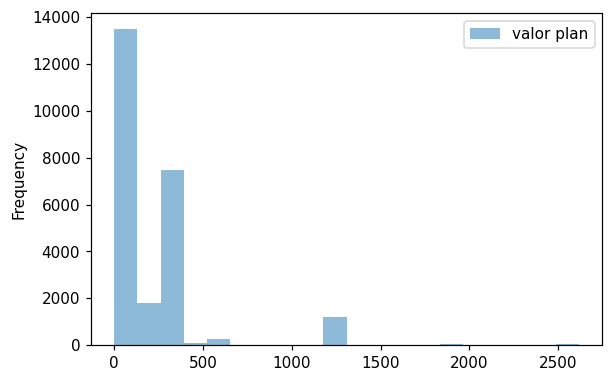

In [ ]:
dflineasretiradas[['valor plan']].plot.hist(bins=20, alpha = 0.5);

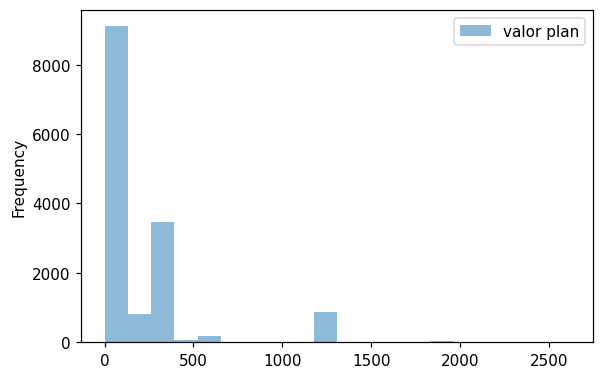

In [ ]:
dflineasretiradas[dflineasretiradas['código estado'] != 92][['valor plan']].plot.hist(bins=20, alpha = 0.5);

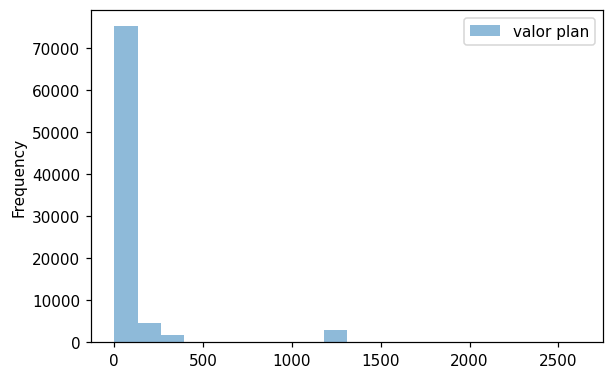

In [ ]:
dflineasactivas[['valor plan']].plot.hist(bins=20, alpha = 0.5);

Se observa que las líneas retiradas tienen más frecuencia de planes más costosos.

* Diagramas de dispersión:

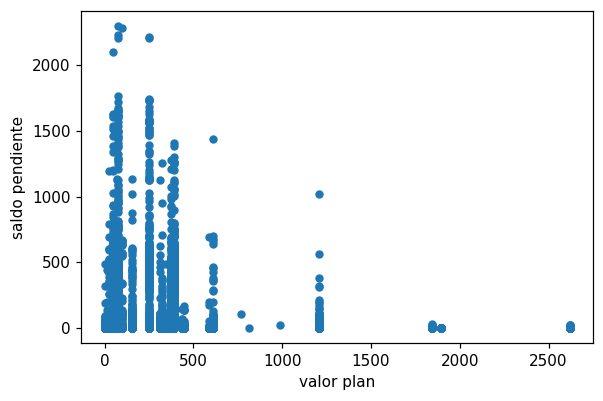

In [ ]:
dflineasretiradas.plot.scatter('valor plan', 'saldo pendiente');    

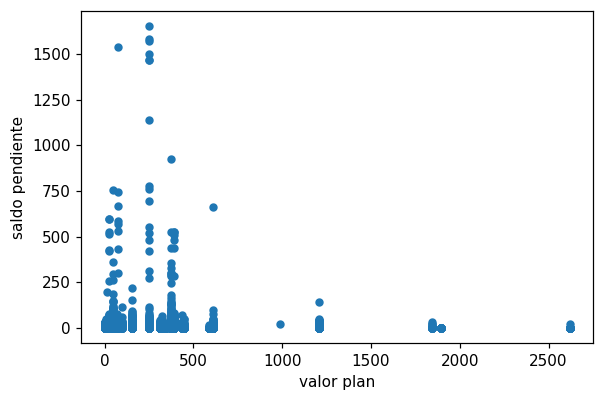

In [ ]:
dflineasretiradas[dflineasretiradas['código estado'] != 92].plot.scatter('valor plan', 'saldo pendiente');  

Se observa que el saldo pendiente de las líneas retiradas no tiene correlación con el valor mensual del plan, ya que se ve en la gráfica de dispersión que la deuda de los planes más costosos es mucho menor en un gran porcentaje de los casos que la deuda de los planes menos costosos. Esto se debe a que muchos de los productos con planes menos costosos tienen financiada la deuda de varios meses y al momento de solicitar el retiro de la línea les cancelan la financiación y la deuda vuelve a la cartera corriente, generandose así unos saldos pendientes muy grandes en comparación al valor mensual del plan. 

También se puede notar que los retiros no relacionados con falta de pago del servicio, también presentan deuda considerable para valores de planes menos costosos.

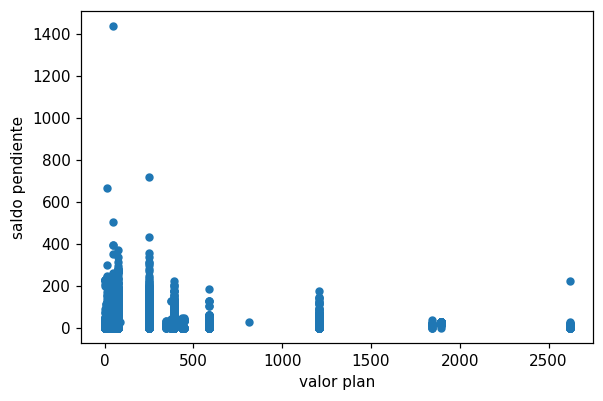

In [ ]:
dflineasactivas.plot.scatter('valor plan', 'saldo pendiente');   

El saldo pendiente del valor de las líneas activas tampoco guarda correlación con el valor mensual del plan, pero cómo era de esperarse no hay diferencia tan significativa como la anterior con respecto al valor mensual del plan, esto ya que las líneas activas financiadas no tienen la deuda financiada todavía en cartera corriente.

# **3. Preparación de los datos**







## **3.1 Limpieza de datos**


### **3.1.1 Limpieza de datos duplicados**


Verificamos líneas duplicadas en el dataset de líneas activas:

In [ ]:
#Verificamos líneas duplicadas
dup = dflineasactivas.duplicated() 
dflineasactivas[dup]['código del producto']

2996     5640816
45802    4787578
3479     3246842
4251     3559563
4248     2438251
          ...   
42344    4272440
71581    4421384
71636    4433450
45389    4736292
75210    5062714
Name: código del producto, Length: 78, dtype: int64

In [ ]:
dflineasactivas.set_index('código del producto').loc[dflineasactivas[dup]['código del producto']]

,código del cliente,fecha de instalación,fecha de retiro,plan,tipo de plan,valor plan,estado,ciclo,estado financiero,saldo pendiente,valor en reclamo,tipo de cliente,tipo de identificación,fecha de nacimiento,género,estado civil,profesión,grado de escolaridad,nivel de ingresos,nivel de egresos,ciudad
código del producto,,,,,,,,,,,,,,,,,,,,,
5640816,978116,2017-11-09 19:24:03,4732-12-31 23:59:59,PLAN PROMO CAMPANAS,C,47.98,CONEXION,CLIENTES CONTRATO 23 - 31,MORA,37.74,0.0,NORMAL,Cédula,1984-05-09 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,AMBATO
5640816,978116,2017-11-09 19:24:03,4732-12-31 23:59:59,PLAN PROMO CAMPANAS,C,47.98,CONEXION,CLIENTES CONTRATO 23 - 31,MORA,37.74,0.0,NORMAL,Cédula,1984-05-09 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,AMBATO
4787578,978116,2016-12-26 17:17:08,4732-12-31 23:59:59,CHIP + |3/30,P,0.00,CONEXION,PREPAGO,PAZ Y SALVO,0.00,0.0,NORMAL,Cédula,1984-05-09 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,AMBATO
4787578,978116,2016-12-26 17:17:08,4732-12-31 23:59:59,CHIP + |3/30,P,0.00,CONEXION,PREPAGO,PAZ Y SALVO,0.00,0.0,NORMAL,Cédula,1984-05-09 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,AMBATO
3246842,417163,2015-03-06 08:46:17,4732-12-31 23:59:59,PLAN CONTROLADO DATOS +VOZ 5,C,390.91,CONEXION,CLIENTES CONTRATO 16 - 22,MORA,33.96,0.0,NORMAL,Cédula,1991-09-22 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,CUENCA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4433450,1557559,2016-07-25 08:55:54,4732-12-31 23:59:59,CHIP + |3/30,P,0.00,CONEXION,PREPAGO,PAZ Y SALVO,0.00,0.0,NORMAL,Cédula,1972-02-19 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,AMBATO
4736292,700529,2016-12-06 15:07:11,4732-12-31 23:59:59,CHIP + |3/30,P,0.00,CONEXION,PREPAGO,PAZ Y SALVO,0.00,0.0,NORMAL,Cédula,1979-10-27 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,CUENCA
4736292,700529,2016-12-06 15:07:11,4732-12-31 23:59:59,CHIP + |3/30,P,0.00,CONEXION,PREPAGO,PAZ Y SALVO,0.00,0.0,NORMAL,Cédula,1979-10-27 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,CUENCA


Se evidencia que hay duplicados efectivamente y debe dejarse sólo un registro único para cada línea duplicada. 

In [ ]:
dflineasactivas.drop_duplicates(inplace=True)
dup = dflineasactivas.duplicated() 
dflineasactivas[dup]['código del producto']

Series([], Name: código del producto, dtype: int64)

In [ ]:
#Verificamos líneas duplicadas
dup = dflineasretiradas.duplicated() 
dflineasretiradas[dup]['código del producto']

875      3467548
6366     3467495
3236     5067606
9644     5808479
4085     5762239
4662     6278376
21511    3052143
5427     6818140
10878    6787265
5857     2674366
5858     2674412
6470     3620504
8708     5061313
18908    5463302
20111    6305629
20230    6393611
26440    6143247
20575    6769337
27067    6745514
Name: código del producto, dtype: int64

Verificamos líneas duplicadas en el dataset de líneas retiradas:

In [ ]:
dflineasretiradas.set_index('código del producto').loc[dflineasretiradas[dup]['código del producto']]

,código del cliente,fecha de instalación,fecha de retiro,plan,tipo de plan,valor plan,código estado,estado,ciclo,estado financiero,saldo pendiente,valor en reclamo,tipo de cliente,tipo de identificación,fecha de nacimiento,género,estado civil,profesión,grado de escolaridad,nivel de ingresos,nivel de egresos,ciudad
código del producto,,,,,,,,,,,,,,,,,,,,,,
3467548,1229007,2015-06-09 09:11:47,2018-01-10 21:43:15,CHIP + |3/30,P,0.00,92,RETIRADO,CLIENTES CONTRATO 1 - 7,PAZ Y SALVO,0.00,0,NORMAL,Cédula,1974-09-22 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,AMBATO
3467548,1229007,2015-06-09 09:11:47,2018-01-10 21:43:15,CHIP + |3/30,P,0.00,92,RETIRADO,CLIENTES CONTRATO 1 - 7,PAZ Y SALVO,0.00,0,NORMAL,Cédula,1974-09-22 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,AMBATO
3467495,1229007,2015-06-09 09:12:11,2018-01-10 21:23:46,CHIP + |3/30,P,0.00,92,RETIRADO,CLIENTES CONTRATO 1 - 7,PAZ Y SALVO,0.00,0,NORMAL,Cédula,1974-09-22 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,AMBATO
3467495,1229007,2015-06-09 09:12:11,2018-01-10 21:23:46,CHIP + |3/30,P,0.00,92,RETIRADO,CLIENTES CONTRATO 1 - 7,PAZ Y SALVO,0.00,0,NORMAL,Cédula,1974-09-22 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,AMBATO
5067606,1963383,2017-04-15 13:40:58,2018-05-18 21:24:38,CHIP + |3/30,P,0.00,92,RETIRADO,CLIENTES CONTRATO 8 - 15,PAZ Y SALVO,0.00,0,NORMAL,Cédula,1974-06-20 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,CUENCA
5067606,1963383,2017-04-15 13:40:58,2018-05-18 21:24:38,CHIP + |3/30,P,0.00,92,RETIRADO,CLIENTES CONTRATO 8 - 15,PAZ Y SALVO,0.00,0,NORMAL,Cédula,1974-06-20 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,CUENCA
5808479,1963383,2017-12-28 11:02:50,2019-07-01 13:29:20,PLAN PROMO CAMPANAS,C,47.98,94,RETIRADO,CLIENTES CONTRATO 16 - 22,PAZ Y SALVO,0.00,0,NORMAL,Cédula,1974-06-20 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,CUENCA
5808479,1963383,2017-12-28 11:02:50,2019-07-01 13:29:20,PLAN PROMO CAMPANAS,C,47.98,94,RETIRADO,CLIENTES CONTRATO 16 - 22,PAZ Y SALVO,0.00,0,NORMAL,Cédula,1974-06-20 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,CUENCA
5762239,2316321,2017-12-21 01:01:00,2018-11-19 02:01:42,PLAN PROMO CAMPANAS,C,70.97,92,RETIRADO,CLIENTES CONTRATO 16 - 22,MORA,23.26,0,NORMAL,Cédula,1993-01-26 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,AMBATO


Se evidencia que hay duplicados efectivamente y debe dejarse sólo un registro único para cada cliente duplicado. 

In [ ]:
dflineasretiradas.drop_duplicates(inplace=True)
dup = dflineasretiradas.duplicated() 
dflineasretiradas[dup]['código del producto']

Series([], Name: código del producto, dtype: int64)

Verificamos líneas duplicadas en los datasets de quejas y reclamos:

In [ ]:
#Verificamos líneas duplicadas
dup = dfquejas.duplicated()
dup[dup]

Series([], dtype: bool)

In [ ]:
#Verificamos líneas duplicadas
dup = dfreclamos.duplicated()
dup[dup] 

Series([], dtype: bool)

### **3.1.2 Limpieza de datos faltantes**

**Imputar datos en los registros con datos faltantes con valores calculados:**

Verificamos datos faltantes en la columna valor del plan del dataset de líneas retiradas, la cual según el comando info() tenía valores faltantes:

In [ ]:
dflineasretiradas[dflineasretiradas.isna()['valor plan']]['plan'].value_counts()

PLAN VOZ CTRL IND      46
VIRTUAL EMPRESA GSM     1
Name: plan, dtype: int64

Efectivamente, existen valores nulos. Se verifica si existen datos del mismo plan mediante los cuales imputar un valor:

In [ ]:
dflineasretiradas[dflineasretiradas['plan'] == 'VIRTUAL EMPRESA GSM']['plan'].value_counts()

VIRTUAL EMPRESA GSM    1
Name: plan, dtype: int64

In [ ]:
dflineasretiradas[dflineasretiradas['plan'] == 'PLAN VOZ CTRL IND']['plan'].value_counts()

PLAN VOZ CTRL IND    232
Name: plan, dtype: int64

Los datos anteriores se encuentran nulos debido a inconsistencias en la configuración de los planes en el sistema transaccional. Se establece la media del valor del plan para los datos faltantes del plan PLAN VOZ CTRL IND y se elimina el registro del plan VIRTUAL EMPRESA GSM al ser solo uno y no haber otro registro del mismo plan con el cual comparar su valor.

In [ ]:
mean = dflineasretiradas[dflineasretiradas['plan'] == 'PLAN VOZ CTRL IND'].mean()['valor plan']

dflineasretiradas.loc[(dflineasretiradas['plan'] == 'PLAN VOZ CTRL IND') & (dflineasretiradas['valor plan'].isna()), 'valor plan'] = mean 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


In [ ]:
dflineasretiradas.dropna(axis = 0, subset = ['valor plan'], inplace = True)

Verificamos que no hayan valores nulos de nuevo:

In [ ]:
dflineasretiradas[dflineasretiradas.isna()['valor plan']]['plan'].value_counts()

Series([], Name: plan, dtype: int64)

Verificamos datos faltantes en la columna valor del plan del dataset de líneas activas, la cual según el comando info() tenía valores faltantes:

In [ ]:
dflineasactivas[dflineasactivas.isna()['valor plan']]['plan'].value_counts()

PLAN GENERICO WCC GSM    477
VIRTUAL EMPRESA GSM       59
Name: plan, dtype: int64

Efectivamente, existen valores nulos. Se verifica si existen datos del mismo plan mediante los cuales imputar un valor:

In [ ]:
dflineasactivas.loc[dflineasactivas['plan'] == 'PLAN GENERICO WCC GSM', 'código del producto'].count()

477

In [ ]:
dflineasactivas.loc[dflineasactivas['plan'] == 'VIRTUAL EMPRESA GSM', 'código del producto'].count()

59

Al no existir registros de los planes listados, con valor del plan no nulo se establece el valor de la media del tipo de plan.

In [ ]:
#dflineasactivas[dflineasactivas['plan'] == 'PLAN GENERICO WCC GSM'].count()
tipoplan = dflineasactivas[dflineasactivas['plan'] == 'PLAN GENERICO WCC GSM']['tipo de plan'].unique() ##mode()

mean = dflineasactivas[dflineasactivas['tipo de plan'] == tipoplan[0]]['valor plan'].mean()

dflineasactivas.loc[(dflineasactivas['plan'] == 'PLAN GENERICO WCC GSM') & (dflineasactivas['valor plan'].isna()), 'valor plan'] = mean 

In [ ]:
tipoplan = dflineasactivas[dflineasactivas['plan'] == 'VIRTUAL EMPRESA GSM']['tipo de plan'].unique() ##mode()

mean = dflineasactivas[dflineasactivas['tipo de plan'] == tipoplan[0]]['valor plan'].mean()

dflineasactivas.loc[(dflineasactivas['plan'] == 'VIRTUAL EMPRESA GSM') & (dflineasactivas['valor plan'].isna()), 'valor plan'] = mean 

Verificamos que no hayan valores nulos de nuevo:

In [ ]:
dflineasactivas[dflineasactivas.isna()['valor plan']]['plan'].value_counts()

Series([], Name: plan, dtype: int64)

**Eliminar los registros/características con datos faltantes:**

Se eliminan columnas Género, Estado civil, Profesión, Grado de escolaridad, Nivel de ingresos y de egresos tanto de los datasets de líneas retiradas como los de activas, debido a que la gran mayoría de los registros tienen estas columnas nulas.

In [ ]:
dflineasretiradas.loc[:,'género':'nivel de egresos'] = np.nan
dflineasretiradas.dropna(axis = 1, how='all', inplace=True)
dflineasretiradas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24458 entries, 0 to 27235
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   código del producto     24458 non-null  int64         
 1   código del cliente      24458 non-null  int64         
 2   fecha de instalación    24458 non-null  datetime64[ns]
 3   fecha de retiro         24458 non-null  datetime64[ns]
 4   plan                    24458 non-null  object        
 5   tipo de plan            24458 non-null  object        
 6   valor plan              24458 non-null  float64       
 7   código estado           24458 non-null  int64         
 8   estado                  24458 non-null  object        
 9   ciclo                   24458 non-null  object        
 10  estado financiero       24458 non-null  object        
 11  saldo pendiente         24458 non-null  float64       
 12  valor en reclamo        24458 non-null  int64 

In [ ]:
dflineasactivas.loc[:,'género':'nivel de egresos'] = np.nan
dflineasactivas.dropna(axis = 1, how='all', inplace=True)
dflineasactivas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85184 entries, 0 to 86549
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   código del producto     85184 non-null  int64         
 1   código del cliente      85184 non-null  int64         
 2   fecha de instalación    85184 non-null  datetime64[ns]
 3   fecha de retiro         85184 non-null  object        
 4   plan                    85184 non-null  object        
 5   tipo de plan            85184 non-null  object        
 6   valor plan              85184 non-null  float64       
 7   estado                  85184 non-null  object        
 8   ciclo                   85184 non-null  object        
 9   estado financiero       85184 non-null  object        
 10  saldo pendiente         85184 non-null  float64       
 11  valor en reclamo        85184 non-null  float64       
 12  tipo de cliente         85184 non-null  object

## **3.2 Selección de características**

### **3.2.1 Combinar características**


Se combinan las columnas codigo de estado y estado del dataset de líneas retiradas, para tener sólo una columna referenciando al mismo atributo:

In [ ]:
dflineasretiradas['estado'] = dflineasretiradas['código estado'].astype(str) + ' - ' + dflineasretiradas['estado']
dflineasretiradas['estado'].value_counts()

95 - RETIRO ATENCION CLIENTE    13506
92 - RETIRADO                    9866
94 - RETIRADO                    1086
Name: estado, dtype: int64

### **3.2.2 Eliminar características**


Se elimina la columna código de estado del dataset de líneas retiradas, la cual ya fue combinada con la columna de estado, y adicionalmente se eliminan las columnas Valor en reclamo y Tipo de cliente de los datasets de líneas retiradas y líneas activas, la primera porque es cero para casi el 100% de los registros en ambos datasets y la segunda porque tiene el mismo valor para casi el 100% de los registros.

In [ ]:
dflineasretiradas['valor en reclamo'].value_counts()

0    24458
Name: valor en reclamo, dtype: int64

In [ ]:
dflineasactivas['valor en reclamo'].value_counts()

0.0     85183
11.2        1
Name: valor en reclamo, dtype: int64

In [ ]:
dflineasactivas['tipo de cliente'].value_counts()

NORMAL         85135
PRUEBA PLAN       45
CORPORATIVO        2
MASIVO             1
VIP                1
Name: tipo de cliente, dtype: int64

In [ ]:
dflineasretiradas['tipo de cliente'].value_counts()

NORMAL         24447
PRUEBA PLAN        7
VIP                4
Name: tipo de cliente, dtype: int64

In [ ]:
del dflineasactivas['valor en reclamo']
del dflineasactivas['tipo de cliente']
dflineasactivas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85184 entries, 0 to 86549
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   código del producto     85184 non-null  int64         
 1   código del cliente      85184 non-null  int64         
 2   fecha de instalación    85184 non-null  datetime64[ns]
 3   fecha de retiro         85184 non-null  object        
 4   plan                    85184 non-null  object        
 5   tipo de plan            85184 non-null  object        
 6   valor plan              85184 non-null  float64       
 7   estado                  85184 non-null  object        
 8   ciclo                   85184 non-null  object        
 9   estado financiero       85184 non-null  object        
 10  saldo pendiente         85184 non-null  float64       
 11  tipo de identificación  85184 non-null  object        
 12  fecha de nacimiento     83494 non-null  object

In [ ]:
del dflineasretiradas['valor en reclamo']
del dflineasretiradas['código estado']
del dflineasretiradas['tipo de cliente']
dflineasretiradas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24458 entries, 0 to 27235
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   código del producto     24458 non-null  int64         
 1   código del cliente      24458 non-null  int64         
 2   fecha de instalación    24458 non-null  datetime64[ns]
 3   fecha de retiro         24458 non-null  datetime64[ns]
 4   plan                    24458 non-null  object        
 5   tipo de plan            24458 non-null  object        
 6   valor plan              24458 non-null  float64       
 7   estado                  24458 non-null  object        
 8   ciclo                   24458 non-null  object        
 9   estado financiero       24458 non-null  object        
 10  saldo pendiente         24458 non-null  float64       
 11  tipo de identificación  24458 non-null  object        
 12  fecha de nacimiento     24040 non-null  object

### **3.2.3 Añadir características**

Concatenamos los datasets de líneas activas y retiradas. Además añadimos la columna Retiro, que indica si una línea está retirada o no (1: retirada, 0: no retirada).

In [ ]:
from datetime import datetime

dflineasactivas['retiro'] = 0
dflineasactivas['fecha de retiro'] = datetime.strptime('31/12/2019 23:59:59', '%d/%m/%Y %H:%M:%S')
dflineasretiradas['retiro'] = 1
dflineas = pd.concat([dflineasactivas, dflineasretiradas])

Se crea la columna Deserción, donde "1" significa que el usuario desistió del servicio y "0" que no desistió del servicio, a partir de la columna Estado:

In [ ]:
dflineas['deserción'] = dflineas['estado'].apply(lambda x: 1 if (x == '95 - RETIRO ATENCION CLIENTE' or x == '94 - RETIRADO') else 0)

Ahora calculamos y añadimos las columnas Edad y Antiguedad, la primera es la edad del cliente de la línea al momento del retiro (último día de 2019 para líneas activas) y la segunda la antigüedad del servicio hasta el momento del retiro (último día de 2019 para líneas activas):

In [ ]:
dflineas['fecha de nacimiento'] =pd.to_datetime(dflineas['fecha de nacimiento'], format='%Y/%m/%d %H:%M:%S', errors = 'coerce')
dflineas['fecha de retiro'] =pd.to_datetime(dflineas['fecha de retiro'], format='%Y/%m/%d %H:%M:%S', errors = 'coerce')  
dflineas['edad'] = dflineas['fecha de retiro'].sub(dflineas['fecha de nacimiento']) 
dflineas['edad'] = np.floor(dflineas['edad'] / np.timedelta64(1, 'Y'))

In [ ]:
dflineas['fecha de nacimiento'] =pd.to_datetime(dflineas['fecha de nacimiento'], format='%Y/%m/%d %H:%M:%S', errors = 'coerce') 
dflineas['antiguedad'] = dflineas['fecha de retiro'].sub(dflineas['fecha de instalación']) 
dflineas['antiguedad'] = np.floor(dflineas['antiguedad'] / np.timedelta64(1, 'Y'))

In [ ]:
dflineas.head(4)

,código del producto,código del cliente,fecha de instalación,fecha de retiro,plan,tipo de plan,valor plan,estado,ciclo,estado financiero,saldo pendiente,tipo de identificación,fecha de nacimiento,ciudad,retiro,deserción,edad,antiguedad
0,4733577,655662,2016-12-05 15:21:46,2019-12-31 23:59:59,VIRTUAL EMPRESA GSM,S,484.4975,CONEXION,CLIENTES VENTA DIRECTA GSM,MORA,36866.67,R.U.C,2011-08-23,AMBATO,0,0,8.0,3.0
257,2484167,655662,2014-06-10 10:21:59,2019-12-31 23:59:59,PLAN TARIFA UNICA $0.08 HSPA PLUS CTRL IND,C,373.0000,CONEXION,CLIENTES CONTRATO 1 - 7,MORA,128.80,R.U.C,2011-08-23,AMBATO,0,0,8.0,5.0
258,2484176,655662,2014-06-10 10:25:39,2019-12-31 23:59:59,PLAN TARIFA UNICA $0.08 HSPA PLUS CTRL IND,C,373.0000,CONEXION,CLIENTES CONTRATO 1 - 7,MORA,128.80,R.U.C,2011-08-23,AMBATO,0,0,8.0,5.0
446,5238166,655662,2017-06-14 07:11:03,2019-12-31 23:59:59,VIRTUAL EMPRESA GSM,S,484.4975,CONEXION,CLIENTES VENTA DIRECTA GSM,MORA,104.44,R.U.C,2011-08-23,AMBATO,0,0,8.0,2.0


Verificamos valores nulos en el dataser de lineas:

In [ ]:
dflineas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109642 entries, 0 to 27235
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   código del producto     109642 non-null  int64         
 1   código del cliente      109642 non-null  int64         
 2   fecha de instalación    109642 non-null  datetime64[ns]
 3   fecha de retiro         109642 non-null  datetime64[ns]
 4   plan                    109642 non-null  object        
 5   tipo de plan            109642 non-null  object        
 6   valor plan              109642 non-null  float64       
 7   estado                  109642 non-null  object        
 8   ciclo                   109642 non-null  object        
 9   estado financiero       109642 non-null  object        
 10  saldo pendiente         109642 non-null  float64       
 11  tipo de identificación  109642 non-null  object        
 12  fecha de nacimiento     107533 

Se observan valores nulos en las columnas de Fecha de nacimiento y Edad, en la misma proporción como es natural. Se procede a realizar imputación para la columna Edad, utilizando el promedio de edad por tipo de plan, estado, tipo de identificación y ciudad:

In [ ]:
dfgroup = dflineas.groupby(['tipo de plan','estado','tipo de identificación','ciudad']).mean()['edad']
dfgroup

tipo de plan  estado                        tipo de identificación  ciudad
C             92 - RETIRADO                 Cédula                  AMBATO    33.837392
                                                                    CUENCA    32.868255
                                            Cédula de Extranjería   AMBATO    42.000000
                                            Pasaporte               AMBATO    52.000000
                                                                    CUENCA    33.333333
                                                                                ...    
S             95 - RETIRO ATENCION CLIENTE  R.U.C                   CUENCA    18.000000
              CONEXION                      Cédula                  AMBATO    41.000000
                                                                    CUENCA    48.680000
                                            R.U.C                   AMBATO    21.384615
                                             

Función que asigna el promedio a las filas sin Edad, dados los criterios anteriores:

In [ ]:
import math

def avg_func(row):
  if math.isnan(row['edad']):
    row['edad'] = np.floor(dfgroup.loc[(row['tipo de plan'], row['estado'], row['tipo de identificación'], row['ciudad'])])
  return row
  
dflineas = dflineas.apply(avg_func, axis = 1)

Verificamos de nuevo valores nulos:

In [ ]:
dflineas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109642 entries, 0 to 27235
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   código del producto     109642 non-null  int64         
 1   código del cliente      109642 non-null  int64         
 2   fecha de instalación    109642 non-null  datetime64[ns]
 3   fecha de retiro         109642 non-null  datetime64[ns]
 4   plan                    109642 non-null  object        
 5   tipo de plan            109642 non-null  object        
 6   valor plan              109642 non-null  float64       
 7   estado                  109642 non-null  object        
 8   ciclo                   109642 non-null  object        
 9   estado financiero       109642 non-null  object        
 10  saldo pendiente         109642 non-null  float64       
 11  tipo de identificación  109642 non-null  object        
 12  fecha de nacimiento     107533 

Eliminamos registros a los que no se les pudo asignar una edad (4 registros). Pero primero eliminamos las columnas usadas para calcular la edad y la 
antigüedad (fecha de instalación,	fecha de retiro y fecha de nacimiento):

In [ ]:
del dflineas['fecha de instalación']
del dflineas['fecha de retiro']
del dflineas['fecha de nacimiento']

In [ ]:
dflineas.dropna(inplace=True) 

In [ ]:
dflineas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109638 entries, 0 to 27235
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   código del producto     109638 non-null  int64  
 1   código del cliente      109638 non-null  int64  
 2   plan                    109638 non-null  object 
 3   tipo de plan            109638 non-null  object 
 4   valor plan              109638 non-null  float64
 5   estado                  109638 non-null  object 
 6   ciclo                   109638 non-null  object 
 7   estado financiero       109638 non-null  object 
 8   saldo pendiente         109638 non-null  float64
 9   tipo de identificación  109638 non-null  object 
 10  ciudad                  109638 non-null  object 
 11  retiro                  109638 non-null  int64  
 12  deserción               109638 non-null  int64  
 13  edad                    109638 non-null  float64
 14  antiguedad           

Ahora calculamos y añadimos la columna de "Número de promedio quejas anual", a partir de la fecha de registro y el número de quejas registradas para cada línea telefónica en el dataset de quejas.

In [ ]:
dfquejas['año'] = dfquejas['fecha de registro'].apply(lambda fecha: str(fecha).split("-")[0])
dfquejas = dfquejas.groupby(['producto','año']).count()['número de solicitud']
dfquejas = dfquejas.groupby('producto').mean()
dfquejas

producto
665135     1.0
704124     2.0
888633     1.0
896234     1.0
897946     1.0
          ... 
7215173    1.0
7227127    1.0
7228707    1.0
7230716    1.0
7231249    1.0
Name: número de solicitud, Length: 8982, dtype: float64

In [ ]:
dflineas = dflineas.join(dfquejas, on='código del producto', how='left')
dflineas.rename({'número de solicitud' : 'nro. promedio quejas anual'},axis=1, inplace = True)
dflineas.loc[dflineas['nro. promedio quejas anual'].isna(), 'nro. promedio quejas anual'] = 0

Ahora calculamos y añadimos las columnas "Número promedio de reclamos anual" y "Valor promedio de reclamos anual", a partir de la fecha de registro, el valor reclamado y el número de reclamos registrados para cada línea telefónica en el dataset de reclamos:

In [ ]:
dfreclamos['año'] = dfreclamos['fecha de registro'].apply(lambda fecha: str(fecha).split("-")[0])

def apply_func(df):

  return pd.Series({
       'count_reclamos': df['número de solicitud'].count(),
       'val_reclamos': df['valor reclamado'].sum()
   })
  
dfreclamos = dfreclamos.groupby(['producto','año']).apply(apply_func)
dfreclamos = dfreclamos.groupby('producto').mean()
dfreclamos.rename({'count_reclamos' : 'nro. promedio reclamos anual', 'val_reclamos' : 'valor promedio reclamos anual'},axis=1, inplace = True)
dfreclamos

,nro. promedio reclamos anual,valor promedio reclamos anual
producto,,
773137,2.000000,23.660000
987823,1.000000,12.316667
990486,1.000000,4.050000
990865,1.333333,183.813333
1114779,1.000000,11.400000
...,...,...
7202642,1.000000,3.610000
7207167,1.000000,1.090000
7207168,1.000000,1.440000


In [ ]:
dflineas = dflineas.join(dfreclamos, on='código del producto', how='left')
dflineas.loc[dflineas['nro. promedio reclamos anual'].isna(), ['nro. promedio reclamos anual','valor promedio reclamos anual']] = 0

Suprimimos los códigos de la línea y el cliente de las columnas del dataset:

In [ ]:
del dflineas['código del cliente']
dflineas.set_index('código del producto', inplace=True)

In [ ]:
dflineas.head()

,plan,tipo de plan,valor plan,estado,ciclo,estado financiero,saldo pendiente,tipo de identificación,ciudad,retiro,deserción,edad,antiguedad,nro. promedio quejas anual,nro. promedio reclamos anual,valor promedio reclamos anual
código del producto,,,,,,,,,,,,,,,,
4733577,VIRTUAL EMPRESA GSM,S,484.4975,CONEXION,CLIENTES VENTA DIRECTA GSM,MORA,36866.67,R.U.C,AMBATO,0,0,8.0,3.0,0.0,3.000000,780.470000
2484167,PLAN TARIFA UNICA $0.08 HSPA PLUS CTRL IND,C,373.0000,CONEXION,CLIENTES CONTRATO 1 - 7,MORA,128.80,R.U.C,AMBATO,0,0,8.0,5.0,0.0,3.666667,497.943333
2484176,PLAN TARIFA UNICA $0.08 HSPA PLUS CTRL IND,C,373.0000,CONEXION,CLIENTES CONTRATO 1 - 7,MORA,128.80,R.U.C,AMBATO,0,0,8.0,5.0,0.0,2.666667,285.883333
5238166,VIRTUAL EMPRESA GSM,S,484.4975,CONEXION,CLIENTES VENTA DIRECTA GSM,MORA,104.44,R.U.C,AMBATO,0,0,8.0,2.0,0.0,2.000000,55961.000000
2607847,DATOS Y VOZ CBM 0 CTRL 3.5G,C,0.0000,CONEXION,CLIENTES CONTRATO 1 - 7,MORA,67.19,R.U.C,AMBATO,0,0,8.0,5.0,0.0,3.500000,341.615000


## **3.3 Dataset final**

Este será el dataset definitivo con el que realizaremos las tareas de análisis y visualización de datos:

In [ ]:
dflineas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109638 entries, 4733577 to 7181617
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   plan                           109638 non-null  object 
 1   tipo de plan                   109638 non-null  object 
 2   valor plan                     109638 non-null  float64
 3   estado                         109638 non-null  object 
 4   ciclo                          109638 non-null  object 
 5   estado financiero              109638 non-null  object 
 6   saldo pendiente                109638 non-null  float64
 7   tipo de identificación         109638 non-null  object 
 8   ciudad                         109638 non-null  object 
 9   retiro                         109638 non-null  int64  
 10  deserción                      109638 non-null  int64  
 11  edad                           109638 non-null  float64
 12  antiguedad             

# **4 Análisis de datos**


##**4.1 Análisis de correlación**

Una de las características de las líneas móviles directamente relacionada con el retiro del servicio por falta de pago naturalmente es el saldo pendiente del servicio. Dado esto analizaremos la correlación que hay entre las diferentes variables cuantitativas y el saldo pendiente:

In [ ]:
dflineas.corr()['saldo pendiente'].sort_values()[::-1] 

saldo pendiente                  1.000000
retiro                           0.106132
valor plan                       0.044805
nro. promedio reclamos anual     0.030930
valor promedio reclamos anual    0.018890
nro. promedio quejas anual       0.000450
deserción                       -0.023435
edad                            -0.039884
antiguedad                      -0.076896
Name: saldo pendiente, dtype: float64

Se encuentra que el coeficiente de correlación es muy bajo para cada una de las características, por lo cual se procede a verificar con una de estas variables, especificamente el valor del plan si se cumple el supuesto de homocedasticidad, es decir, las muestras tienen varianzas homogéneas:



In [ ]:
stat, pvalor = stats.levene(dflineas['saldo pendiente'], dflineas['valor plan'])
if pvalor < 0.05:  
  print(f'Las muestras no tienen varianzas homogéneas (rechazar H0) p = {pvalor:.3f}')
else:
  print(f'Las muestras tienen varianza homogéneas (no rechazar H0) p = {pvalor:.3f}')

Las muestras no tienen varianzas homogéneas (rechazar H0) p = 0.000


Efectivamente las muestras no tienen varianzas homogéneas, por lo tanto se procede a calcular la correlación con el coeficiente de correlación de Spearman:

In [ ]:
def correlacion_spearmanr_con_significancia(a, b):
  coef, p = stats.spearmanr(a, b)
  print(f'Coeficiente de correlación de Spearman: {coef:.2f}')
  print(f'pvalue: {p:.2f}')
  if p > 0.05:
    print(f'Las muestras no están correlacionadas (no rechazar H0) p = {p:.3f}')
  else:
    print(f'Las muestras están correlacionadas (rechazar H0) p = {p:.3f}')

In [ ]:
correlacion_spearmanr_con_significancia(dflineas['saldo pendiente'], dflineas['valor plan'])

Coeficiente de correlación de Spearman: 0.57
pvalue: 0.00
Las muestras están correlacionadas (rechazar H0) p = 0.000


Como se puede observar el coeficiente correlación para la variable *valor plan* aumentó de 0.044804 a 0.57, con un p-valor = 0, indicando un alto nivel de significancia estadística.

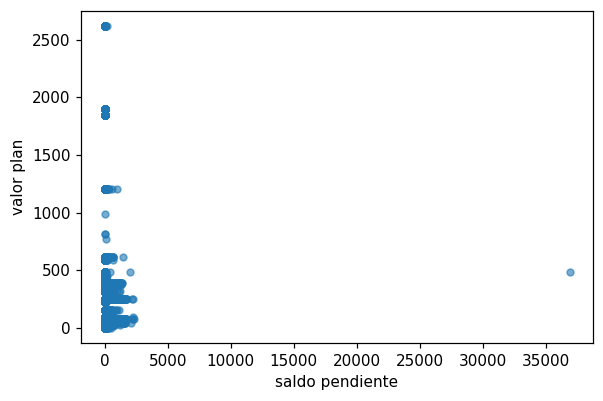

In [ ]:
dflineas.plot.scatter('saldo pendiente', 'valor plan', alpha = 0.6);

Según el gráfico de correlación anterior entre las variables *saldo pendiente* y *valor plan*, este coeficiente se podría incluso mejorar ya que se observan algunos datos atípicos.

En la siguiente tabla se observa que la correlación entre las variables cuantitativas y el saldo pendiente aumenta considerablemente usando el coeficiente correlación de Spearman:

In [ ]:
dflineas.corr(method='spearman')['saldo pendiente'].sort_values()[::-1] 

saldo pendiente                  1.000000
valor plan                       0.573900
nro. promedio quejas anual       0.132712
retiro                           0.127501
valor promedio reclamos anual    0.015769
nro. promedio reclamos anual     0.015656
deserción                       -0.052823
edad                            -0.070452
antiguedad                      -0.189297
Name: saldo pendiente, dtype: float64

## **4.2 Análisis de regresión**

Se crea el dataset que vamos a utilizar para el análisis de regresión a partir del dataset de líneas telefónicas, adecuando algunos nombres al formato que permiten los métodos que utilizaremos:

In [ ]:
dflineasregresion = dflineas
dflineas.rename({'tipo de plan' : 'tplan',
                 'valor plan' : 'vplan',
                 'estado financiero' : 'efinanciero',
                 'saldo pendiente' : 'spendiente',
                 'tipo de identificación' : 'tidentificación',
                 'nro. promedio quejas anual' : 'npromedioquejas',
                 'nro. promedio reclamos anual' : 'npromedioreclamos',
                 'valor promedio reclamos anual' : 'vpromedioreclamos'},axis=1, inplace = True)
dflineasregresion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109638 entries, 4733577 to 7181617
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   plan               109638 non-null  object 
 1   tplan              109638 non-null  object 
 2   vplan              109638 non-null  float64
 3   estado             109638 non-null  object 
 4   ciclo              109638 non-null  object 
 5   efinanciero        109638 non-null  object 
 6   spendiente         109638 non-null  float64
 7   tidentificación    109638 non-null  object 
 8   ciudad             109638 non-null  object 
 9   retiro             109638 non-null  int64  
 10  deserción          109638 non-null  int64  
 11  edad               109638 non-null  float64
 12  antiguedad         109638 non-null  float64
 13  npromedioquejas    109638 non-null  float64
 14  npromedioreclamos  109638 non-null  float64
 15  vpromedioreclamos  109638 non-null  float64


#### **4.1.1 Regresión lineal**

Anteriormente se analizó la relación entre el saldo pendiente de la línea y el valor del plan, ahora se procederá a modelar la relación del saldo pendiente con esta característica y otras características tanto cuantitativas y categóricas tales como:

* Tipo de plan       
* Valor del plan                     
* Ciclo                         
* Tipo de identificación
* Edad
* Antigüedad
* Número promedio de quejas anual
* Número promedio de reclamos anual
* Valor promedio de reclamos anual
  


In [ ]:
model = sm.OLS.from_formula("spendiente ~ tplan + vplan + ciclo + tidentificación + edad + antiguedad + npromedioquejas + npromedioreclamos + vpromedioreclamos", data=dflineasregresion)

result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             spendiente   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     201.6
Date:                Thu, 30 Sep 2021   Prob (F-statistic):               0.00
Time:                        02:26:43   Log-Likelihood:            -6.8919e+05
No. Observations:              109638   AIC:                         1.378e+06
Df Residuals:                  109617   BIC:                         1.379e+06
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                   59.5189      1.588     37.469      0.000      56.406      62.632
tplan[T.P]                                 -32.8826      1.280    -25.690      0.000     -35.391     -30.374
tplan[T.S]                                 116.4741     27.928      4.171      0.000      61.736     171.212
ciclo[T.CLIENTES CONTRATO 16 - 22]          -4.2644      1.291     -3.304      0.001      -6.794      -1.735
ciclo[T.CLIENTES CONTRATO 23 - 31]           1.3478      2.530      0.533      0.594      -3.611       6.307
ciclo[T.CLIENTES CONTRATO 8 - 15]           -4.5189      1.459     -3.097      0.002      -7.379      -1.659
ciclo[T.CLIENTES VENTA DIRECTA]           -144.9206    132.926     -1.090      0.276    -405.453     115.612
ciclo[T.CLIENTES VENTA DIRECTA GSM]        567.7232     31.255     18.164      0.000     506.463     628.983
ciclo[T.MULTIAGENCIAS CNT]                  15.6794     23.410      0.670      0.503     -30.204      61.563
ciclo[T.PREPAGO]                            -4.7014      1.476     -3.185      0.001      -7.595      -1.808
ciclo[T.TELECSA]                             4.2177     64.998      0.065      0.948    -123.178     131.614
tidentificación[T.Cédula de Extranjería]     2.5028      9.400      0.266      0.790     -15.921      20.926
tidentificación[T.Otro]                     10.2176     58.126      0.176      0.860    -103.709     124.144
tidentificación[T.Pasaporte]                -0.0106      3.619     -0.003      0.998      -7.104       7.082
tidentificación[T.R.U.C]                    -8.4268      1.488     -5.663      0.000     -11.343      -5.510
vplan                                       -0.0116      0.002     -6.308      0.000      -0.015      -0.008
edad                                        -0.3081      0.029    -10.609      0.000      -0.365      -0.251
antiguedad                                  -3.4370      0.233    -14.746      0.000      -3.894      -2.980
npromedioquejas                             -7.5582      1.268     -5.959      0.000     -10.044      -5.072
npromedioreclamos                           12.8774      1.284     10.026      0.000      10.360      15.395
vpromedioreclamos                           -0.0003      0.002     -0.164      0.869      -0.004       0.004
==============================================================================
Omnibus:                   534740.694   Durbin-Watson:                   1.101
Prob(Omnibus):                  0.000   Jarque-Bera (JB):   13526531446202.734
Skew:                         197.677   Prob(JB):                         0.00
Kurtosis:                   54416.521   Cond. No.                     9.84e+04
========================================================================

El modelo obtuvo un R2 de 0.035. Se procede a generar de nuevo el modelo descartando variables con coeficientes poco significativos como Valor del plan y Valor promedio de reclamos anual:

In [ ]:
model = sm.OLS.from_formula("spendiente ~ tplan + ciclo + tidentificación + edad + antiguedad + npromedioquejas + npromedioreclamos", data=dflineasregresion)

result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             spendiente   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     221.7
Date:                Thu, 30 Sep 2021   Prob (F-statistic):               0.00
Time:                        02:26:44   Log-Likelihood:            -6.8921e+05
No. Observations:              109638   AIC:                         1.378e+06
Df Residuals:                  109619   BIC:                         1.379e+06
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                   56.9916      1.537     37.070      0.000      53.978      60.005
tplan[T.P]                                 -29.8000      1.183    -25.185      0.000     -32.119     -27.481
tplan[T.S]                                 113.6317     27.927      4.069      0.000      58.896     168.367
ciclo[T.CLIENTES CONTRATO 16 - 22]          -4.1699      1.291     -3.231      0.001      -6.700      -1.640
ciclo[T.CLIENTES CONTRATO 23 - 31]          -0.1263      2.520     -0.050      0.960      -5.065       4.812
ciclo[T.CLIENTES CONTRATO 8 - 15]           -4.5032      1.459     -3.086      0.002      -7.364      -1.643
ciclo[T.CLIENTES VENTA DIRECTA]           -141.4928    132.947     -1.064      0.287    -402.067     119.082
ciclo[T.CLIENTES VENTA DIRECTA GSM]        569.2745     31.210     18.240      0.000     508.103     630.446
ciclo[T.MULTIAGENCIAS CNT]                  15.3032     23.414      0.654      0.513     -30.588      61.195
ciclo[T.PREPAGO]                            -4.5788      1.476     -3.101      0.002      -7.472      -1.685
ciclo[T.TELECSA]                             3.7289     65.010      0.057      0.954    -123.689     131.147
tidentificación[T.Cédula de Extranjería]     2.0708      9.401      0.220      0.826     -16.355      20.497
tidentificación[T.Otro]                      9.5957     58.136      0.165      0.869    -104.350     123.542
tidentificación[T.Pasaporte]                -0.4187      3.619     -0.116      0.908      -7.512       6.674
tidentificación[T.R.U.C]                   -11.8454      1.386     -8.546      0.000     -14.562      -9.129
edad                                        -0.3189      0.029    -10.999      0.000      -0.376      -0.262
antiguedad                                  -3.3810      0.233    -14.514      0.000      -3.838      -2.924
npromedioquejas                             -7.2689      1.268     -5.734      0.000      -9.754      -4.784
npromedioreclamos                           12.8075      1.272     10.066      0.000      10.314      15.301
==============================================================================
Omnibus:                   534678.901   Durbin-Watson:                   1.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):   13511378453868.402
Skew:                         197.597   Prob(JB):                         0.00
Kurtosis:                   54386.034   Cond. No.                     1.38e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.38e+04. This might indicate that there are
strong multicollinearity or 

Se puede observar que el modelo obtuvo un R2 igual que el anterior (0.035). 

Según los resultados obtenidos se puede concluir que el saldo pendiente se ve afectado positivamente por las siguientes características, es decir, influyen en que el saldo pendiente sea mayor:

* Tipo de plan: S - postpago                            
* Ciclo: CLIENTES VENTA DIRECTA GSM, MULTIAGENCIAS CNT y TELECSA                      
* Tipo de identificación: Cédula de Extranjería y Otro
* Número promedio de reclamos anual

Así como las anteriores características aumentan en cierta medida el saldo pendiente, las siguientes características hacen que sea menor:

* Tipo de plan: P - prepago                            
* Ciclo: CLIENTES CONTRATO 16 - 22, CLIENTES CONTRATO 23 - 31, CLIENTES CONTRATO 8 - 15, CLIENTES VENTA DIRECTA y PREPAGO                       
* Tipo de identificación: Pasaporte y R.U.C
* Edad
* Antigüedad
* Número promedio de quejas anual


#### **4.2.2 Regresión logística**

Otra pregunta que se requiere resolver en este análisis es si existe una relación entre ciertas características de las líneas telefónicas y el hecho de que usuario del servicio se retire voluntariamente, ese decir, desista del servicio. Para resolver esta pregunta se modelará la variable binaria *deserción* mediante una regresión logística, donde "1" significa que el usuario desistió del servicio y "0" que no desistió del servicio, a partir de las siguientes características:

* Tipo de plan                        
* Estado financiero       
* Ciclo                   
* Estado financiero  
* Saldo pendiente     
* Tipo de identificación
* Edad
* Antigüedad
* Número promedio de quejas anual
* Número promedio de reclamos anual
* Valor promedio de reclamos anual

In [ ]:
model = smf.logit("deserción ~ tplan + vplan + ciclo + efinanciero + spendiente + tidentificación + edad + antiguedad + npromedioquejas + npromedioreclamos + vpromedioreclamos", data=dflineasregresion)
result = model.fit()
result.summary()

         Current function value: 0.360304
         Iterations: 35


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              deserción   No. Observations:               109638
Model:                          Logit   Df Residuals:                   109615
Method:                           MLE   Df Model:                           22
Date:                Thu, 30 Sep 2021   Pseudo R-squ.:                 0.08138
Time:                        02:26:48   Log-Likelihood:                -39503.
converged:                      False   LL-Null:                       -43003.
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                   -1.0301      0.042    -24.490      0.000      -1.113      -0.948
tplan[T.P]                                  -0.4108      0.032    -12.899      0.000      -0.473      -0.348
tplan[T.S]                                   0.9093      0.556      1.635      0.102      -0.181       2.000
ciclo[T.CLIENTES CONTRATO 16 - 22]          -0.2567      0.029     -8.831      0.000      -0.314      -0.200
ciclo[T.CLIENTES CONTRATO 23 - 31]           0.1915      0.062      3.105      0.002       0.071       0.312
ciclo[T.CLIENTES CONTRATO 8 - 15]           -0.2117      0.033     -6.508      0.000      -0.275      -0.148
ciclo[T.CLIENTES VENTA DIRECTA]            -14.9985   1883.036     -0.008      0.994   -3705.681    3675.684
ciclo[T.CLIENTES VENTA DIRECTA GSM]         -3.8934      1.150     -3.385      0.001      -6.148      -1.639
ciclo[T.MULTIAGENCIAS CNT]                   0.9293      0.754      1.232      0.218      -0.549       2.408
ciclo[T.PREPAGO]                            -0.3503      0.035    -10.100      0.000      -0.418      -0.282
ciclo[T.TELECSA]                           -10.9773    442.022     -0.025      0.980    -877.325     855.370
efinanciero[T.PAZ Y SALVO]                   0.7749      0.031     24.671      0.000       0.713       0.837
tidentificación[T.Cédula de Extranjería]     0.0611      0.259      0.236      0.814      -0.447       0.569
tidentificación[T.Otro]                      1.6333      1.134      1.440      0.150      -0.589       3.856
tidentificación[T.Pasaporte]                -0.0473      0.095     -0.501      0.617      -0.233       0.138
tidentificación[T.R.U.C]                    -0.1070      0.034     -3.115      0.002      -0.174      -0.040
vplan                                        0.0008   3.67e-05     21.620      0.000       0.001       0.001
spendiente                                  -0.0066      0.001    -13.203      0.000      -0.008      -0.006
edad                                        -0.0106      0.001    -15.005      0.000      -0.012      -0.009
antiguedad                                  -0.3322      0.006    -51.377      0.000      -0.345      -0.320
npromedioquejas                              0.2094      0.028      7.457      0.000       0.154       0.264
npromedioreclamos                            0.1339      0.027      4.880      0.000       0.080       0.188
vpromedioreclamos                           -0.0001      0.000     -0.766      0.444      -0.000       0.000
============================================================================================================
"""

El modelo obtuvo un R2 de 0.08138. Se procede a generar de nuevo el modelo descartando variables con coeficientes poco significativos como Valor del plan, Saldo pendiente, Edad, Valor promedio de reclamos anual:

In [ ]:
model = smf.logit("deserción ~ tplan + ciclo + efinanciero + tidentificación + antiguedad + npromedioquejas + npromedioreclamos", data=dflineasregresion)
result = model.fit() 
result.summary()

         Current function value: 0.365129
         Iterations: 35


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              deserción   No. Observations:               109638
Model:                          Logit   Df Residuals:                   109619
Method:                           MLE   Df Model:                           18
Date:                Thu, 30 Sep 2021   Pseudo R-squ.:                 0.06908
Time:                        02:26:52   Log-Likelihood:                -40032.
converged:                      False   LL-Null:                       -43003.
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                   -1.4872      0.026    -56.994      0.000      -1.538      -1.436
tplan[T.P]                                  -0.6362      0.029    -21.579      0.000      -0.694      -0.578
tplan[T.S]                                   0.9665      0.545      1.774      0.076      -0.102       2.035
ciclo[T.CLIENTES CONTRATO 16 - 22]          -0.2943      0.029    -10.216      0.000      -0.351      -0.238
ciclo[T.CLIENTES CONTRATO 23 - 31]           0.2800      0.060      4.661      0.000       0.162       0.398
ciclo[T.CLIENTES CONTRATO 8 - 15]           -0.2508      0.032     -7.777      0.000      -0.314      -0.188
ciclo[T.CLIENTES VENTA DIRECTA]            -16.2341   2997.437     -0.005      0.996   -5891.103    5858.635
ciclo[T.CLIENTES VENTA DIRECTA GSM]         -4.0854      1.144     -3.571      0.000      -6.328      -1.843
ciclo[T.MULTIAGENCIAS CNT]                   0.7683      0.757      1.015      0.310      -0.715       2.252
ciclo[T.PREPAGO]                            -0.4187      0.035    -12.136      0.000      -0.486      -0.351
ciclo[T.TELECSA]                           -11.4712    574.295     -0.020      0.984   -1137.069    1114.126
efinanciero[T.PAZ Y SALVO]                   1.0772      0.027     40.508      0.000       1.025       1.129
tidentificación[T.Cédula de Extranjería]     0.0970      0.259      0.374      0.708      -0.411       0.605
tidentificación[T.Otro]                      1.6616      1.143      1.454      0.146      -0.579       3.902
tidentificación[T.Pasaporte]                 0.0151      0.094      0.160      0.873      -0.170       0.200
tidentificación[T.R.U.C]                     0.3372      0.029     11.634      0.000       0.280       0.394
antiguedad                                  -0.3353      0.006    -52.496      0.000      -0.348      -0.323
npromedioquejas                              0.2151      0.028      7.718      0.000       0.160       0.270
npromedioreclamos                            0.1188      0.026      4.628      0.000       0.069       0.169
============================================================================================================
"""

Se puede observar que el modelo obtuvo un R2 muy parecido al anterior (0.06908). 

Teniendo en cuenta la formula de la regresión logística: $$y = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x)}}$$

Se puede concluir que para valores de x positivos, lo cual es nuestro caso ya que las características que analizamos tienen valores mayores o iguales a cero, entre más grande y positivo sea un coeficiente más se va a acercar la variable dependiente *y* a 1. Dado esto y según los resultados obtenidos se puede concluir que la deserción del servicio se ve influida o depende en mayor manera de las siguientes características:

* Tipo de plan: S - postpago                            
* Ciclo: CLIENTES CONTRATO 23 - 31 y MULTIAGENCIAS CNT                       
* Estado financiero: paz y salvo  
* Tipo de identificación (especialmente R.U.C y Otro)
* Número promedio de quejas anual
* Número promedio de reclamos anual

Así como las anteriores características aumentan la probabilidad de deserción, se puede concluir que las siguientes características reducen dicha probabilidad:

* Tipo de plan: P - prepago                            
* Ciclo: CLIENTES CONTRATO 16 - 22, CLIENTES CONTRATO 8 - 15, CLIENTES VENTA DIRECTA, CLIENTES VENTA DIRECTA GSM, PREPAGO y TELECSA                   
* antiguedad

# **5 Visualización de información**

En esta sección al igual que en la anterior nos enfocaremos en estudiar la relación de manera visual las características de interés: deserción del servicio y el saldo pendiente por pagar. 

In [ ]:
dflineasvisual = dflineas
dflineasvisual.rename({'tipo de plan' : 'tplan',
                 'valor plan' : 'vplan',
                 'estado financiero' : 'efinanciero',
                 'saldo pendiente' : 'spendiente',
                 'tipo de identificación' : 'tidentificación',
                 'nro. promedio quejas anual' : 'npromedioquejas',
                 'nro. promedio reclamos anual' : 'npromedioreclamos',
                 'estado absoluto' : 'estadoabsoluto',
                 'valor promedio reclamos anual' : 'vpromedioreclamos'},axis=1, inplace = True)
dflineas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109638 entries, 4733577 to 7181617
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   plan               109638 non-null  object 
 1   tplan              109638 non-null  object 
 2   vplan              109638 non-null  float64
 3   estado             109638 non-null  object 
 4   ciclo              109638 non-null  object 
 5   efinanciero        109638 non-null  object 
 6   spendiente         109638 non-null  float64
 7   tidentificación    109638 non-null  object 
 8   ciudad             109638 non-null  object 
 9   retiro             109638 non-null  int64  
 10  deserción          109638 non-null  int64  
 11  edad               109638 non-null  float64
 12  antiguedad         109638 non-null  float64
 13  npromedioquejas    109638 non-null  float64
 14  npromedioreclamos  109638 non-null  float64
 15  vpromedioreclamos  109638 non-null  float64


* Se estudia visualmente la distribución por edades y por ciudad de las deserción del servicio, mediante un diagrama de cajas:

[Text(0, 0, 'No desertado'), Text(0, 0, 'Desertado')]

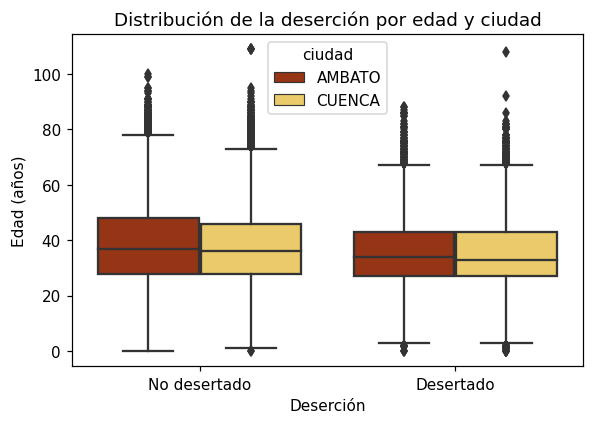

In [ ]:
edad_desercion_cajas = sns.boxplot(x="deserción", 
                                  y="edad", 
                                  data=dflineasvisual, 
                                  hue='ciudad',
                                  palette='afmhot')

edad_desercion_cajas.set_title("Distribución de la deserción por edad y ciudad")
edad_desercion_cajas.set_ylabel("Edad (años)")
edad_desercion_cajas.set_xlabel("Deserción");
edad_desercion_cajas.set_xticklabels(['No desertado', 'Desertado'])

Se puede observar un comportamiento muy similar en la distribución de deserciones y no deserciones para cada ciudad, en cada una de las diferentes medidas estadísticas (mediana, rango intercuartílico, rango). Se observa ligeramente que la población que desertó del servicio está en un rango de edades más bajo.

* Se estudia visualmente la distribución por antigüedad y por ciudad de las deserción del servicio, mediante un diagrama de violín:

[Text(0, 0, 'No desertado'), Text(0, 0, 'Desertado')]

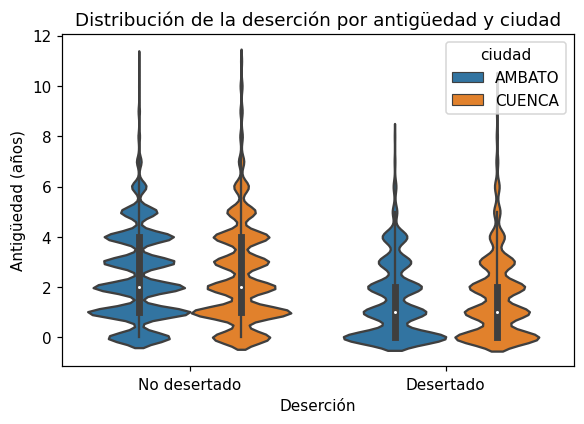

In [ ]:
antig_desercion_cajas = sns.violinplot(x="deserción", y="antiguedad", data=dflineasvisual, hue='ciudad');

antig_desercion_cajas.set_title("Distribución de la deserción por antigüedad y ciudad")
antig_desercion_cajas.set_ylabel("Antigüedad (años)")
antig_desercion_cajas.set_xlabel("Deserción");
antig_desercion_cajas.set_xticklabels(['No desertado', 'Desertado'])


Se puede observar nuevamente un comportamiento muy similar en la distribución de deserciones y no deserciones para cada ciudad, en cada una de las diferentes medidas estadísticas (mediana, rango intercuartílico, rango). Se observa claramente que la población que desertó del servicio correponden a un rango menos antiguo del servicio.

* Se realiza visualización de la correlación entre las variables cuantitativas del dataset de líneas telefónicas, mediante un mapa de calor. Para esto se realiza primero una normalización de los valores:



In [ ]:
cols=['spendiente', 'edad', 'antiguedad', 'vplan', 'npromedioquejas', 'vpromedioreclamos','npromedioreclamos' ]
df_norm = dflineasvisual[cols]  

In [ ]:
df_norm =(df_norm - df_norm.mean())/df_norm.std()

In [ ]:
dflineas_corr_matrix = sns.heatmap(df_norm.corr(), cmap='coolwarm', vmin=-1);
dflineas_corr_matrix.set_title('Correlation heatmap')

Se observa correlación inversa del saldo pendiente y el valor del plan con la edad y la antigüedad, sugiriendo mayor endeudamiento entre los clientes del servicio más nuevos y jóvenes.

Además, se observa correlación directa entre la edad y la antigüedad de la línea, suponiendo una fidelidad del servicio en cierta medida.

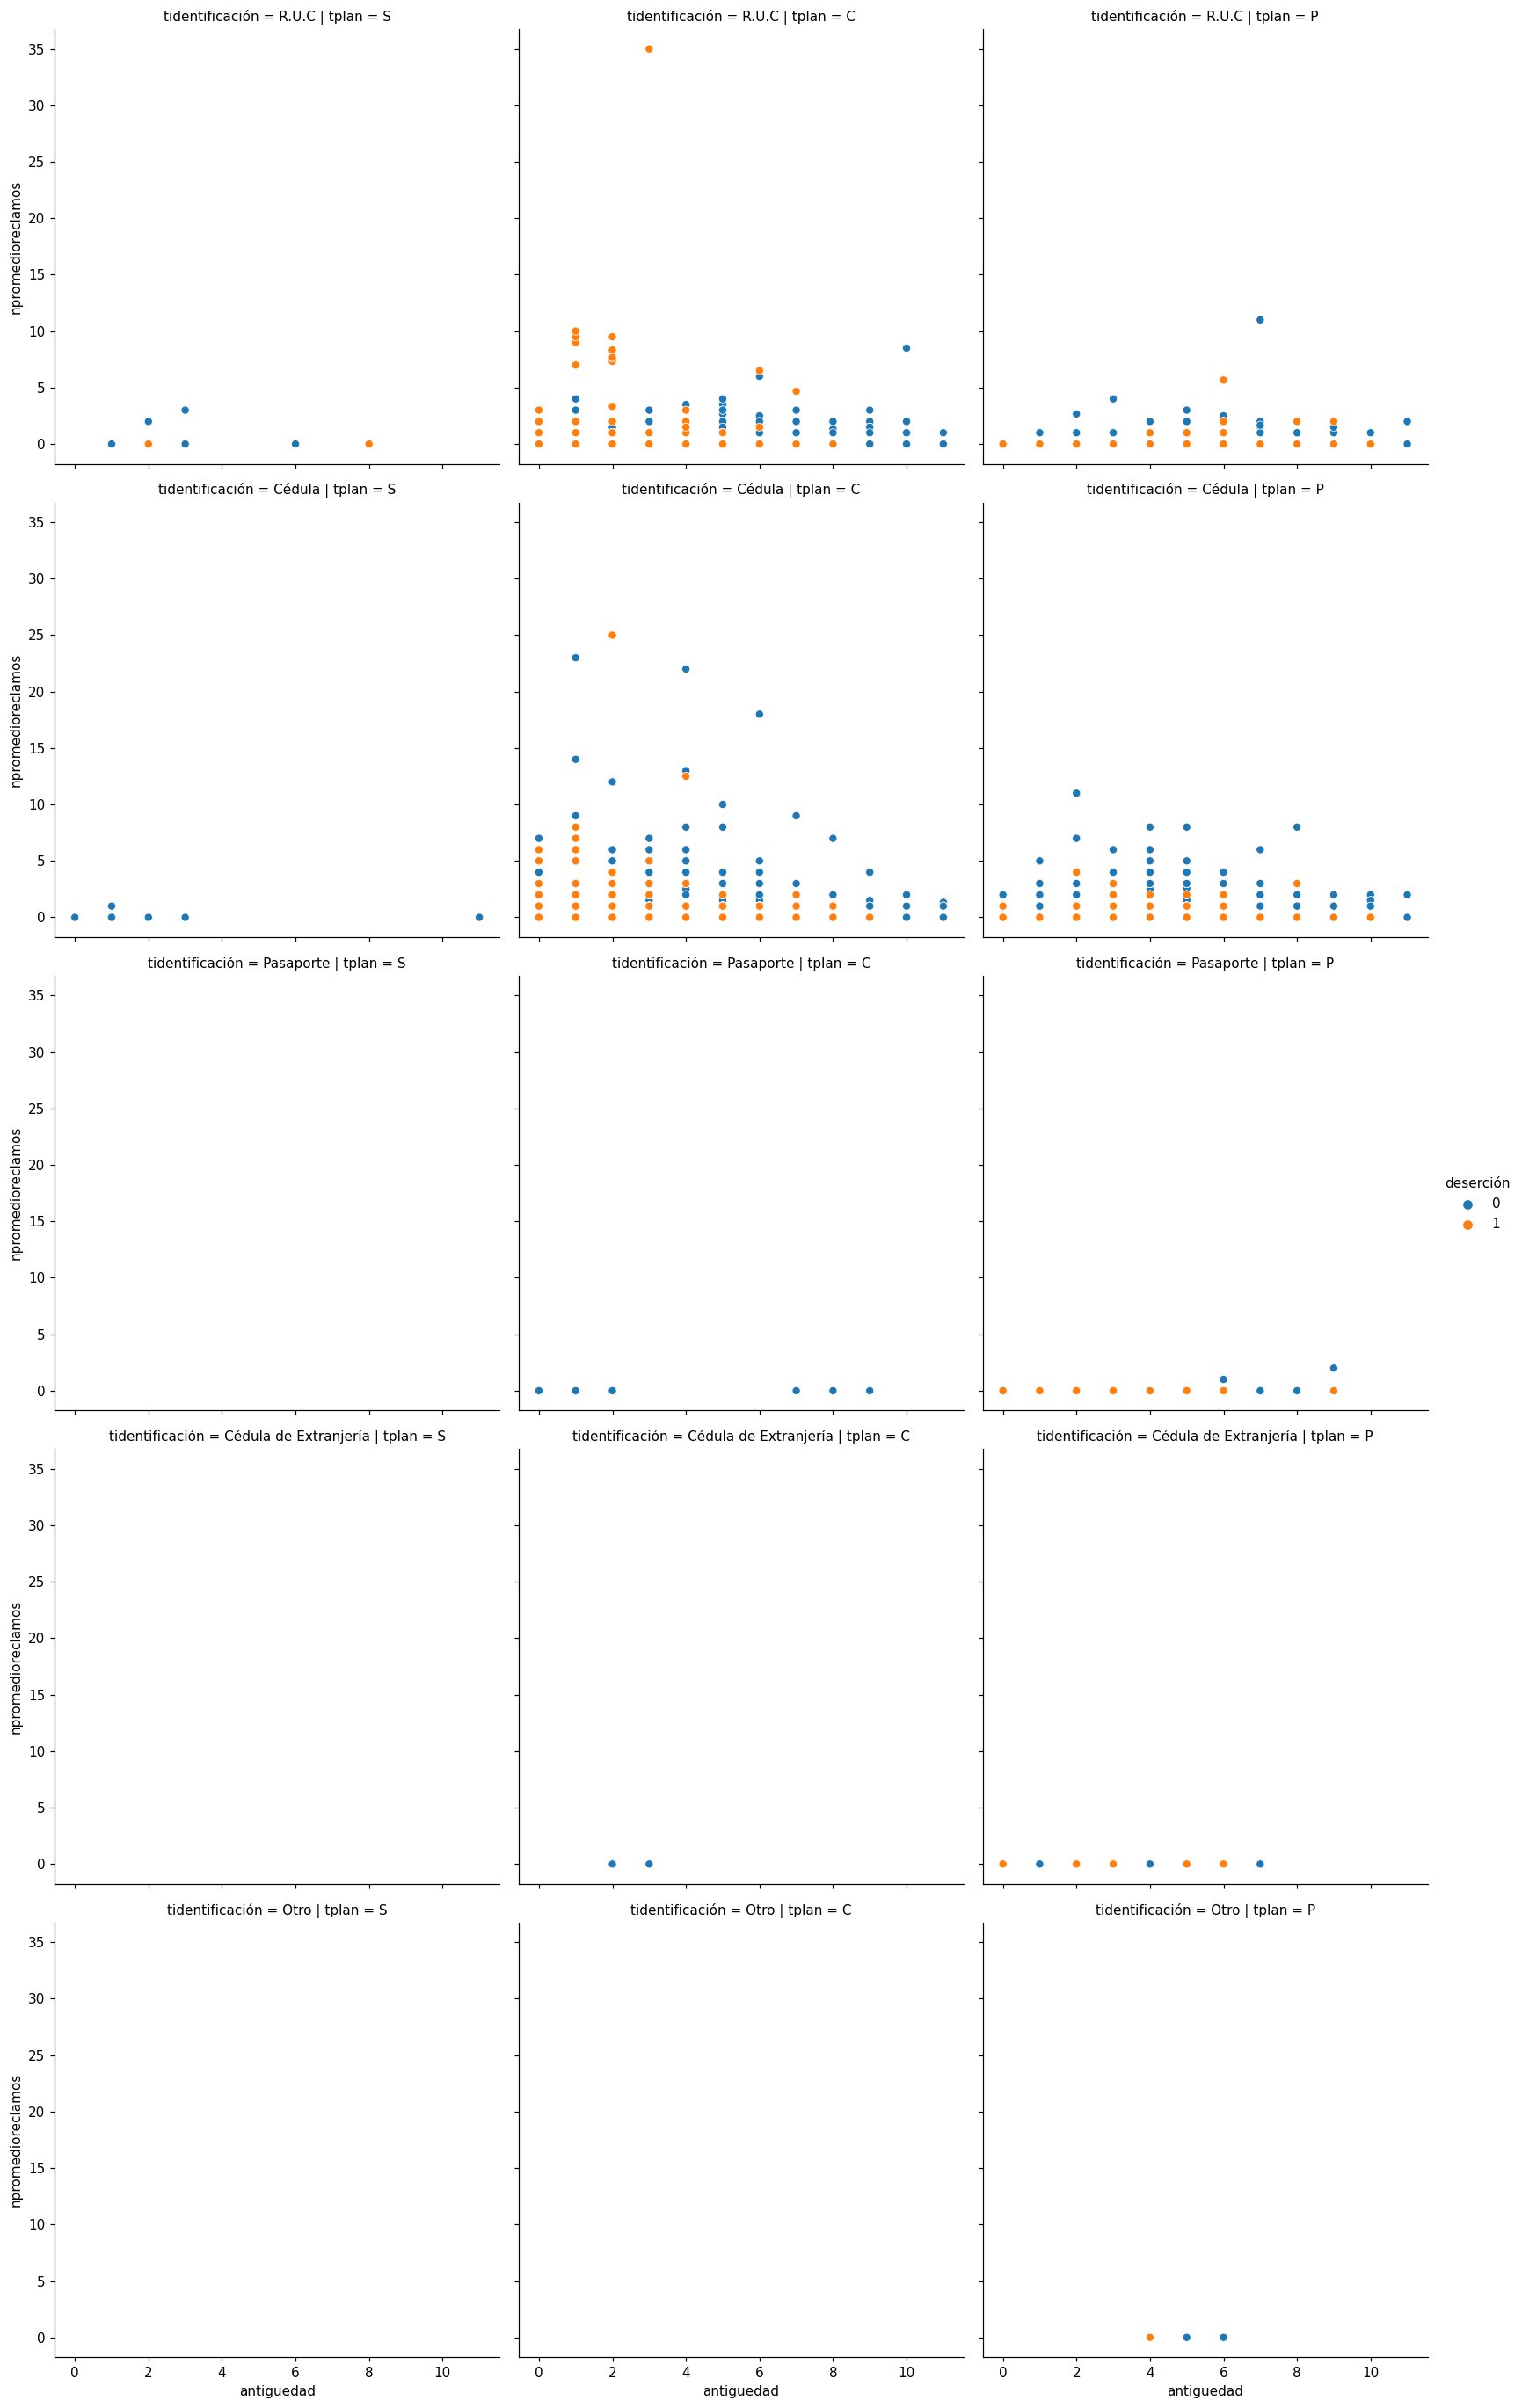

In [ ]:
visual = sns.relplot(data=dflineasvisual, x="antiguedad", y="npromedioreclamos", hue="deserción", kind = 'scatter',
            col = 'tplan',
            row = 'tidentificación'           
            );
           

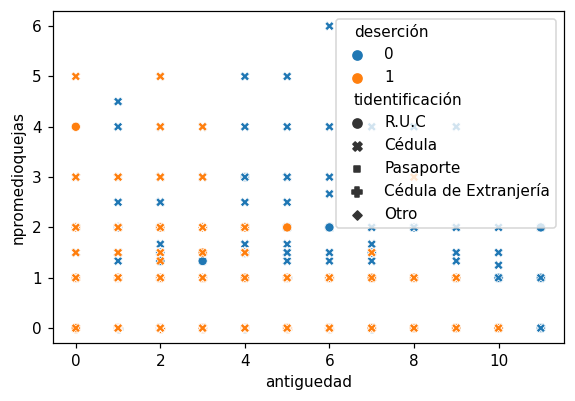

In [ ]:
sns.scatterplot(data=dflineasvisual, x="antiguedad", y="npromedioquejas",
                hue="deserción",      # Tono de color
                style="tidentificación");   # Estilo del marcador.

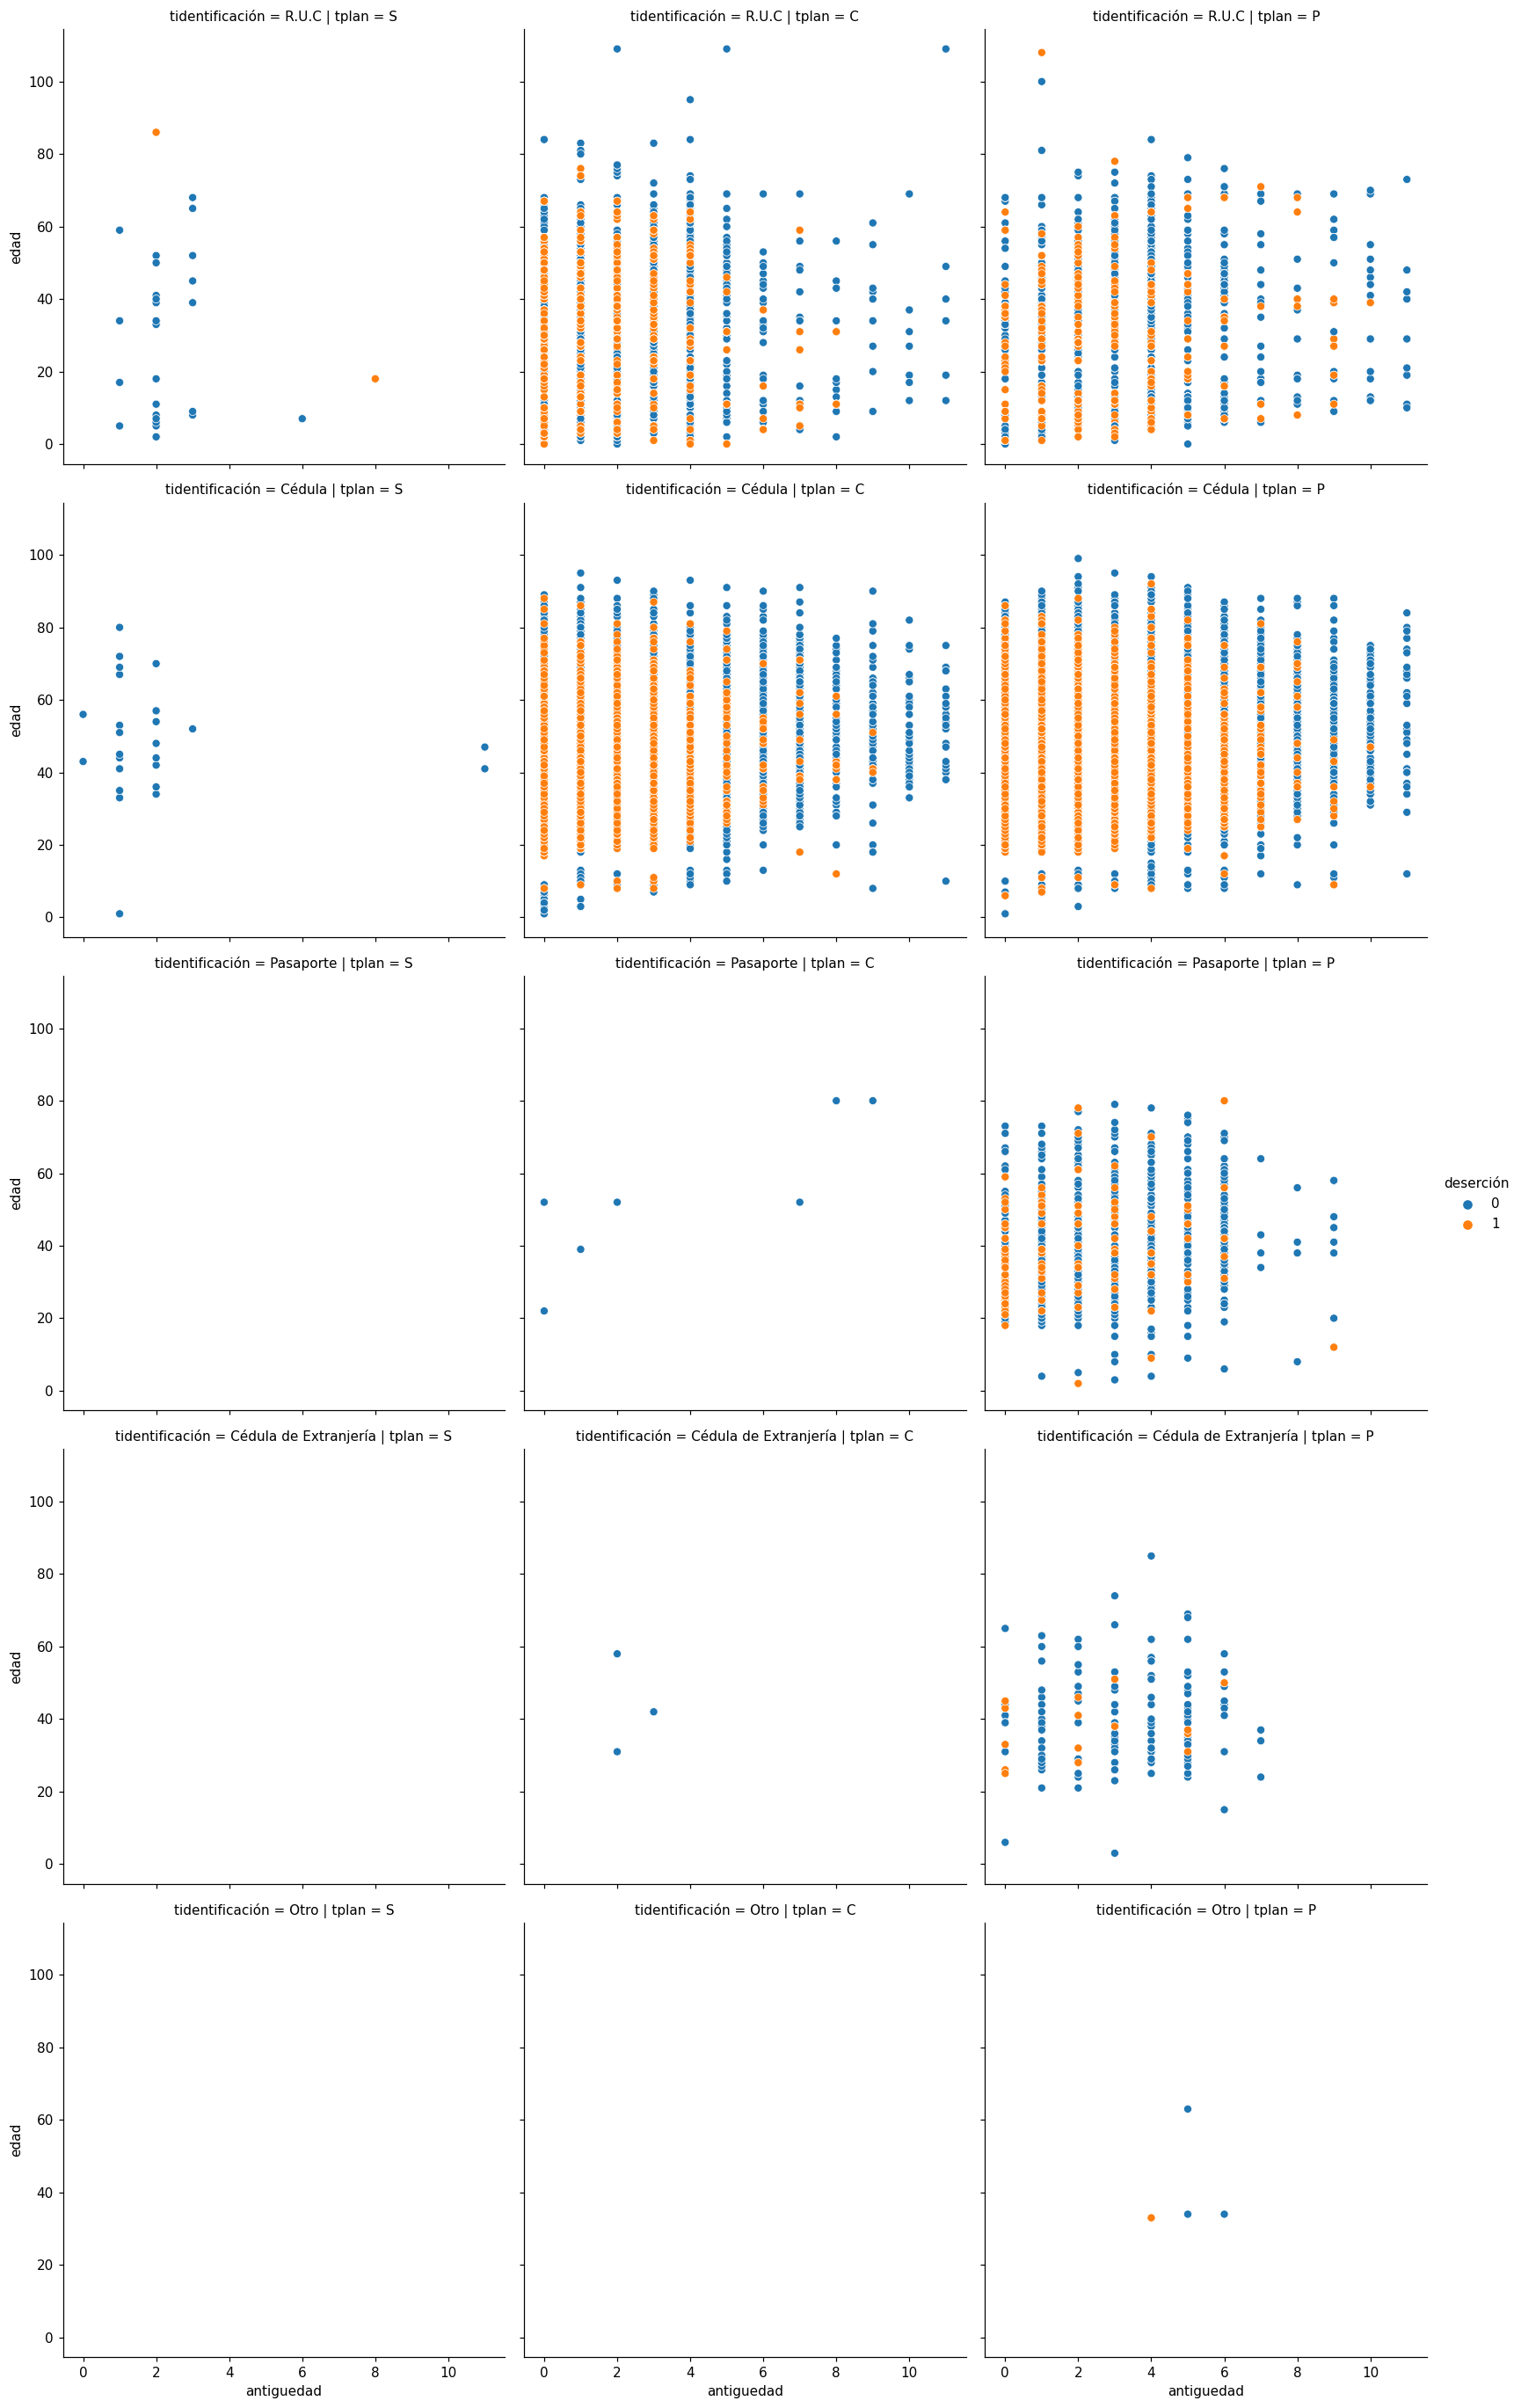

In [ ]:
visual = sns.relplot(data=dflineasvisual, x="antiguedad", y="edad", hue="deserción", kind = 'scatter',
            col = 'tplan',
            row = 'tidentificación'           
            );